In [2]:
from rtt_tools import dump_data
from rtt_tools.dump_data import *  # pussy died because of this wildcard import

import collections
import json
import re
import os
import math
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import matplotlib
import random
import itertools

import networkx as nx
import matplotlib.pyplot as plt
import graphviz
from graphviz import Digraph, Graph
from scipy import stats

import textwrap
from matplotlib.backends.backend_pdf import PdfPages

logger = logging.getLogger(__name__)
coloredlogs.CHROOT_FILES = []
coloredlogs.install(level=logging.INFO, use_chroot=False)

In [3]:
# path add
ossl_path = os.path.join(os.getenv('HOME'), 'local', 'openssl', 'bin')
if ossl_path not in sys.path: 
    sys.path.append(ossl_path)
    os.environ['PATH'] += ':' + ossl_path

In [4]:
loader = dump_data.Loader()

In [5]:
exp_id_list = [25,26,27] #[10,11,12]  # [2,3,4,5,7,8]
loader.load({'no_pvals':True, 'only_pval_cnt': True, 'experiments': exp_id_list})
#loader.load({'no_pvals':False, 'only_pval_cnt': False, 'experiments': exp_id_list})
#loader.load({'no_pvals':False, 'only_pval_cnt': False, 'experiment_ids': list(range(9566, 11570+1))})

2019-08-05 16:40:29 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all experiments
2019-08-05 16:40:30 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Number of all experiments: 5316
2019-08-05 16:40:30 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all batteries, len: 5316
2019-08-05 16:40:31 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all tests, len: 37171
2019-08-05 16:40:31 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:40:31 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:40:31 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:40:31 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:40:32 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:40:32 aura.fi.muni.cz rtt_tools.dump_data[124556] INF

2019-08-05 16:40:45 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:40:45 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:40:45 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:40:46 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest params, len: 10000
2019-08-05 16:40:46 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest stats, len: 10000
2019-08-05 16:40:47 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:40:47 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:40:48 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:40:48 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:40:48 aura.fi.muni.

2019-08-05 16:41:02 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:41:02 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:41:02 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest params, len: 10000
2019-08-05 16:41:02 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest stats, len: 10000
2019-08-05 16:41:03 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:41:03 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:41:03 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:41:03 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest params, len: 10000
2019-08-05 16:41:03 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest stats, len: 10000
2019-08-05 16:41:04 aura.fi.muni.

2019-08-05 16:41:17 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:41:17 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest params, len: 10000
2019-08-05 16:41:18 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest stats, len: 10000
2019-08-05 16:41:19 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:41:19 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:41:19 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:41:19 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:41:19 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:41:19 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:41:20 aura.fi.muni.

2019-08-05 16:41:33 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:41:33 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:41:33 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:41:33 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:41:33 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest params, len: 10000
2019-08-05 16:41:34 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest stats, len: 10000
2019-08-05 16:41:34 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:41:34 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:41:34 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:41:34 aura.fi.muni.

2019-08-05 16:41:48 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:41:49 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest params, len: 10000
2019-08-05 16:41:49 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest stats, len: 10000
2019-08-05 16:41:49 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:41:49 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:41:49 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:41:50 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest params, len: 10000
2019-08-05 16:41:50 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest stats, len: 10000
2019-08-05 16:41:50 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:41:50 aura.fi.muni.

2019-08-05 16:42:05 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest stats, len: 10000
2019-08-05 16:42:06 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:42:06 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:42:06 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:42:06 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:42:06 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest params, len: 10000
2019-08-05 16:42:06 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest stats, len: 10000
2019-08-05 16:42:07 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:42:07 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:42:07 aura.fi.muni.

2019-08-05 16:42:22 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:42:22 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:42:23 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:42:23 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:42:23 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest params, len: 10000
2019-08-05 16:42:23 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest stats, len: 10000
2019-08-05 16:42:23 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:42:23 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:42:24 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:42:24 aura.fi.muni.

2019-08-05 16:42:36 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest stats, len: 10000
2019-08-05 16:42:37 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:42:37 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:42:37 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:42:37 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:42:37 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest params, len: 10000
2019-08-05 16:42:37 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest stats, len: 10000
2019-08-05 16:42:38 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:42:38 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:42:38 aura.fi.muni.

2019-08-05 16:42:53 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:42:53 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:42:53 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest params, len: 10000
2019-08-05 16:42:53 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest stats, len: 10000
2019-08-05 16:42:54 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:42:54 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:42:54 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:42:54 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:42:54 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest params, len: 10000
2019-08-05 16:42:55 aura.fi.muni

2019-08-05 16:43:08 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:43:08 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:43:08 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:43:08 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest params, len: 10000
2019-08-05 16:43:08 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest stats, len: 10000
2019-08-05 16:43:09 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:43:09 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:43:09 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:43:09 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:43:09 aura.fi.muni.

2019-08-05 16:43:26 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:43:26 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:43:26 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest params, len: 10000
2019-08-05 16:43:27 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest stats, len: 10000
2019-08-05 16:43:27 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:43:27 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:43:27 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:43:27 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest params, len: 10000
2019-08-05 16:43:28 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest stats, len: 10000
2019-08-05 16:43:28 aura.fi.muni.

2019-08-05 16:43:40 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest params, len: 10000
2019-08-05 16:43:41 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest stats, len: 10000
2019-08-05 16:43:41 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:43:41 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:43:41 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:43:41 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:43:41 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest params, len: 10000
2019-08-05 16:43:42 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest stats, len: 10000
2019-08-05 16:43:42 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:43:42 aura.fi.muni

2019-08-05 16:43:59 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:43:59 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest params, len: 10000
2019-08-05 16:43:59 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest stats, len: 10000
2019-08-05 16:44:00 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:44:00 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:44:00 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:44:00 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:44:00 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:44:00 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:44:00 aura.fi.muni.

2019-08-05 16:44:14 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:44:14 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:44:15 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:44:15 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:44:15 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest params, len: 10000
2019-08-05 16:44:15 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all subtest stats, len: 10000
2019-08-05 16:44:15 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:44:16 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variant params, len: 2000
2019-08-05 16:44:16 aura.fi.muni.cz rtt_tools.dump_data[124556] INFO Loading all variants params, len: 1000
2019-08-05 16:44:16 aura.fi.muni

In [6]:
#loader.process()
loader.add_passed = True
loader.comp_sub_pvals(add_all=True, pick_one=False)

In [179]:
#loader.experiments[11588].exp_info.meth

## Test categorization

In [7]:
# Data sizes -> tests -> test_config -> counts
test_configs = collections.defaultdict(
    lambda: collections.defaultdict(
        lambda: collections.defaultdict(
            lambda: 0
        )))

# Data sizes -> tests -> test_config -> config_data -> counts
test_configs_val = collections.defaultdict(
    lambda: collections.defaultdict(
        lambda: collections.defaultdict(
            lambda: collections.defaultdict(
                lambda: 0
        ))))


# data size -> test_flat -> counts
flat_configs_types = collections.defaultdict(
    lambda: collections.defaultdict(
            lambda: 0
        ))

# data size -> test_flat -> counts
flat_configs = collections.defaultdict(
    lambda: collections.defaultdict(
            lambda: 0
        ))

# Data sizes -> tests -> test_config+variantval -> counts
test_configs_var = collections.defaultdict(
    lambda: collections.defaultdict(
        lambda: collections.defaultdict(
            lambda: 0
        )))


all_subs = []
for tt in loader.tests.values():
    exp = tt.battery.exp
    size = exp.exp_info.size
    tt_id = '|'.join(reversed(tt.short_desc()))

    for vv in tt.variants.values():
        cfs = '|'.join([str(x) for x in vv.settings.keys_tuple()])
        cfv = '|'.join([str(x) for x in vv.settings.values_tuple()])

        for ss in vv.sub_tests.values():
            tfs = '|'.join([str(x) for x in ss.params.keys_tuple()])
            tfv = '|'.join([str(x) for x in ss.params.values_tuple()])
            tcfg = '{%s}{%s}' % (cfs, tfs)
            tcfg_val = '{%s}{%s}' % (cfv, tfv)
            type_val = '[%s][%s]' % (tt_id, tcfg)
            var_val = '{%s}{%s}' % (cfs, cfv) 
            full_val = '[%s][%s][%s]' % (tt_id, tcfg, tcfg_val)

            test_configs[size][tt_id][tcfg] += 1
            test_configs['ALL'][tt_id][tcfg] += 1
            
            test_configs_var[size][tt_id][var_val] += 1
            test_configs_var['ALL'][tt_id][var_val] += 1
            
            test_configs_val[size][tt_id][tcfg][tcfg_val] += 1
            test_configs_val['ALL'][tt_id][tcfg][tcfg_val] += 1
            
            flat_configs[size][full_val] += 1
            flat_configs['ALL'][full_val] += 1
            flat_configs_types[size][type_val] += 1
            flat_configs_types['ALL'][type_val] += 1
            
            if len(ss.pvals) > 0:
                all_subs.append(ss)     

In [8]:
#Broken fragment for pvalues test, SKIP
def logdif(a,b):
    if a == 0 or b == 0: return None
    return math.log(a,2) - math.log(b,2)

def get_pval_partition(pval, pvalbins):
    binidx = 0
    for idx, b in enumerate(pvalbins):
        if pval < b:
            return idx
    return len(pvalbins)

def shortenTest(name):
    if isinstance(name, (list, tuple)):
        name = '|'.join([str(x) for x in name])
    name = name.replace('NIST Statistical Testing Suite', 'NSTS')
    name = name.replace('Dieharder', 'D')
    name = name.replace('TestU01 Rabbit', 'U01R')
    name = name.replace('TestU01 Block Alphabit', 'U01BA')
    name = name.replace('TestU01 Alphabit', 'U01A')
    name = name.replace('TestU01 Small Crush', 'U01SC')
    name = name.replace('TestU01 Big Crush', 'U01BC')
    return name

In [182]:
print(json.dumps(test_configs_var, indent=2))

{
  "10485760": {
    "Dieharder|Diehard Birthdays Test": {
      "{P-sample count}{65}": 2658
    },
    "Dieharder|Diehard OPERM5 Test": {
      "{P-sample count}{1}": 2658
    },
    "Dieharder|Diehard 32x32 Binary Rank Test": {
      "{P-sample count}{1}": 2658
    },
    "Dieharder|Diehard 6x8 Binary Rank Test": {
      "{P-sample count}{1}": 2658
    },
    "Dieharder|Diehard Bitstream Test": {
      "{P-sample count}{1}": 2658
    },
    "Dieharder|Diehard Count the 1s (stream) Test": {
      "{P-sample count}{39}": 2658
    },
    "Dieharder|Diehard Count the 1s Test (byte)": {
      "{P-sample count}{1}": 2658
    },
    "Dieharder|Diehard Parking Lot Test": {
      "{P-sample count}{100}": 2658
    },
    "Dieharder|Diehard Minimum Distance (2d Circle) Test": {
      "{P-sample count}{100}": 2658
    },
    "Dieharder|Diehard 3d Sphere (Minimum Distance) Test": {
      "{P-sample count}{100}": 2658
    },
    "Dieharder|Diehard Squeeze Test": {
      "{P-sample count}{1}": 26

In [183]:
lst = sorted(set(list(flat_configs_types['ALL'].keys())))
print(json.dumps(lst, indent=2))

[
  "[Dieharder|DAB DCT][{P-sample count}{}]",
  "[Dieharder|Diehard 32x32 Binary Rank Test][{P-sample count}{}]",
  "[Dieharder|Diehard 3d Sphere (Minimum Distance) Test][{P-sample count}{}]",
  "[Dieharder|Diehard 6x8 Binary Rank Test][{P-sample count}{}]",
  "[Dieharder|Diehard Birthdays Test][{P-sample count}{}]",
  "[Dieharder|Diehard Bitstream Test][{P-sample count}{}]",
  "[Dieharder|Diehard Count the 1s (stream) Test][{P-sample count}{}]",
  "[Dieharder|Diehard Count the 1s Test (byte)][{P-sample count}{}]",
  "[Dieharder|Diehard Craps Test][{P-sample count}{}]",
  "[Dieharder|Diehard Minimum Distance (2d Circle) Test][{P-sample count}{}]",
  "[Dieharder|Diehard OPERM5 Test][{P-sample count}{}]",
  "[Dieharder|Diehard Parking Lot Test][{P-sample count}{}]",
  "[Dieharder|Diehard Runs Test][{P-sample count}{}]",
  "[Dieharder|Diehard Squeeze Test][{P-sample count}{}]",
  "[Dieharder|Marsaglia and Tsang GCD Test][{P-sample count}{}]",
  "[Dieharder|RGB Bit Distribution Test][{N-t

In [184]:
lst = sorted(set(list(flat_configs['ALL'].keys())))
print(json.dumps(lst, indent=2))

[
  "[Dieharder|DAB DCT][{P-sample count}{}][{1}{}]",
  "[Dieharder|Diehard 32x32 Binary Rank Test][{P-sample count}{}][{19}{}]",
  "[Dieharder|Diehard 32x32 Binary Rank Test][{P-sample count}{}][{1}{}]",
  "[Dieharder|Diehard 3d Sphere (Minimum Distance) Test][{P-sample count}{}][{100}{}]",
  "[Dieharder|Diehard 6x8 Binary Rank Test][{P-sample count}{}][{1}{}]",
  "[Dieharder|Diehard 6x8 Binary Rank Test][{P-sample count}{}][{41}{}]",
  "[Dieharder|Diehard Birthdays Test][{P-sample count}{}][{100}{}]",
  "[Dieharder|Diehard Birthdays Test][{P-sample count}{}][{65}{}]",
  "[Dieharder|Diehard Bitstream Test][{P-sample count}{}][{1}{}]",
  "[Dieharder|Diehard Bitstream Test][{P-sample count}{}][{95}{}]",
  "[Dieharder|Diehard Count the 1s (stream) Test][{P-sample count}{}][{100}{}]",
  "[Dieharder|Diehard Count the 1s (stream) Test][{P-sample count}{}][{39}{}]",
  "[Dieharder|Diehard Count the 1s Test (byte)][{P-sample count}{}][{19}{}]",
  "[Dieharder|Diehard Count the 1s Test (byte)][{

In [185]:
print(json.dumps(flat_configs, indent=2))

{
  "10485760": {
    "[Dieharder|Diehard Birthdays Test][{P-sample count}{}][{65}{}]": 2658,
    "[Dieharder|Diehard OPERM5 Test][{P-sample count}{}][{1}{}]": 2658,
    "[Dieharder|Diehard 32x32 Binary Rank Test][{P-sample count}{}][{1}{}]": 2658,
    "[Dieharder|Diehard 6x8 Binary Rank Test][{P-sample count}{}][{1}{}]": 2658,
    "[Dieharder|Diehard Bitstream Test][{P-sample count}{}][{1}{}]": 2658,
    "[Dieharder|Diehard Count the 1s (stream) Test][{P-sample count}{}][{39}{}]": 2658,
    "[Dieharder|Diehard Count the 1s Test (byte)][{P-sample count}{}][{1}{}]": 2658,
    "[Dieharder|Diehard Parking Lot Test][{P-sample count}{}][{100}{}]": 2658,
    "[Dieharder|Diehard Minimum Distance (2d Circle) Test][{P-sample count}{}][{100}{}]": 2658,
    "[Dieharder|Diehard 3d Sphere (Minimum Distance) Test][{P-sample count}{}][{100}{}]": 2658,
    "[Dieharder|Diehard Squeeze Test][{P-sample count}{}][{1}{}]": 2658,
    "[Dieharder|Diehard Runs Test][{P-sample count}{}][{24}{}]": 5316,
    "[D

In [186]:
stables = set()
for msize in flat_configs_types:
    tests = flat_configs_types[msize]
    for t in tests:
        stables.add(t)
    
for msize in flat_configs_types:
    tests = flat_configs_types[msize]
    for test in tests:
        # other sizes
        for msize_other in [x for x in flat_configs_types if x != msize]:
            if test not in flat_configs_types[msize_other]:
                stables.discard(test)
                #msize = int(msize)
                #msize_other = int(msize_other)
                print('DIf: %10s->%10s: %s' % (msize, msize_other, test))
    #print(msize)
    
print('Stables....')
for xx in stables:
    print('.. %s' % xx)

DIf:        ALL->  10485760: [Dieharder|Marsaglia and Tsang GCD Test][{P-sample count}{}]
DIf:        ALL->  10485760: [Dieharder|DAB DCT][{P-sample count}{}]
DIf:        ALL->  10485760: [TestU01 Small Crush|smarsa_BirthdaySpacings][{Repetitions}{N|d|n|p|r|t}]
DIf:        ALL->  10485760: [TestU01 Small Crush|sknuth_Collision][{Repetitions}{N|Sparse|d|n|r|t}]
DIf:        ALL->  10485760: [TestU01 Small Crush|sknuth_CouponCollector][{Repetitions}{N|d|n|r}]
DIf:        ALL->  10485760: [TestU01 Small Crush|sknuth_MaxOft][{Repetitions}{N|d|n|r|t}]
DIf:        ALL->  10485760: [TestU01 Small Crush|smarsa_MatrixRank][{Repetitions}{L|N|k|n|r|s}]
DIf:        ALL->  10485760: [TestU01 Small Crush|swalk_RandomWalk1][{Repetitions}{L0|L1|N|n|r|s}]
DIf:  104857600->  10485760: [Dieharder|Marsaglia and Tsang GCD Test][{P-sample count}{}]
DIf:  104857600->  10485760: [Dieharder|DAB DCT][{P-sample count}{}]
DIf:  104857600->  10485760: [TestU01 Small Crush|smarsa_BirthdaySpacings][{Repetitions}{N|d|

## Test analysis

In [9]:
# Test analysis and scoring
exps = list(loader.experiments.values())
exps.sort(key=lambda x: (x.exp_info.size, x.exp_info.meth, x.exp_info.seed, x.exp_info.fnc_name, x.exp_info.fnc_round))
exps_grouper = lambda x: (x.exp_info.size, x.exp_info.meth, x.exp_info.fnc_name, x.exp_info.fnc_round)  # aggregate different runs with different SEEDs
rev_exp = {x.name: i for i,x in enumerate(exps)}

# Iterate over test
# test[name] = [pvals] per experiment, on a fixed position. None if not present.
tests = collections.defaultdict(lambda: [None] * len(exps))
test_ids_counts = collections.defaultdict(lambda: 0)
for tt in loader.tests.values():
    tt_id = '|'.join(reversed(tt.short_desc()))
    tests[tt_id][rev_exp[tt.battery.exp.name]] = tt.get_single_pval()  # uses sidak maybe
    # print(tt.get_single_pval(), tt.shidak_alpha(0.10), tt.summarized_pvals)
    
# Sort tests, so we have defined ordering
tests_srt = [(k,tests[k]) for k in tests]
tests_srt.sort(key=lambda x: x[0])

#for x in tests_srt:
#    print(x[0])

In [10]:
# subtest breakdown
subtests = collections.defaultdict(lambda: [None] * len(exps))
for sti, st in enumerate(loader.sids.values()):
    st_id = tuple(reversed(st.short_desc()))
    subtests[st_id][rev_exp[st.variant.test.battery.exp.name]] = st.stats[0].value if st.stats else None
        
# Sort tests, so we have defined ordering
subtests_srt = [(k,subtests[k]) for k in subtests]
subtests_srt.sort(key=lambda x: x[0]) 

# for x in subtests_srt:
#    print(x[0])

In [11]:
def get_maximum_detections(selection, tests_srt, do_p):
    ctests = project_tests(tests_srt, selection)
    total_det = sum(selection) * len(tests_srt)
    tests_undefined = collections.defaultdict(lambda: 0)  # tname -> # of NONE in test
    total_def_det = 0

    # Fails removal & report
    for tname, tvals in ctests:
        for idx, tval in enumerate(tvals):
            if tval is None:
                eidx = get_ex_byidx(selection, idx)
                tests_undefined[tname] += 1
                #print('%s : %s' % (tname, exps[eidx].name))
            else:
                total_def_det += 1
    return total_def_det     
    
def get_detections(ctests, alpha):
    totals = len(ctests) * len(ctests[0][1])
    test_fails = [sum(1 for y in x[1] if y is None) for x in ctests]  # no data cases
    tests_detections = [(
        x[0], 
        sum(1 for y in x[1] if y is not None and y <= alpha) / (len(x[1]) - test_fails[i]),
        sum(1 for y in x[1] if y is not None and y <= alpha),
        test_fails[i],
        len(x[1])
        ) for i, x in enumerate(ctests) if (len(x[1]) - test_fails[i]) > 0]
    return tests_detections

def fill_x_data(x_data, y_data, x_data_desired, fill_fnc=lambda x: 0):
    """Augments x, y data to precisely match x_data_desired with fill function. x_data has to be sorted"""
    # Remove all not present
    n_x, n_y = [], []
    xdes_set = set(x_data_desired)
    for ix, name in enumerate(x_data):
        if name in xdes_set:
            n_x.append(x_data[ix])
            n_y.append(y_data[ix])
            
    # Add all missing, now is a subset
    off = 0
    for idx, name in enumerate(x_data_desired):
        if idx >= len(n_x) or n_x[idx] != name:
            n_x.insert(idx, name)
            n_y.insert(idx, fill_fnc((idx, name)))
            
    return n_x, n_y

def wrapHyphened(txt, width=20):
    res = ['']
    parts = txt.split('-')
    for ix, p in enumerate(parts):
        if len(res[-1]) + len(p) > width:
            res.append('')
        res[-1] += p + ('-' if ix < len(parts)-1 else '')
    return res

def doChunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]
    
def filterTests(tests_srt):
    res = []
    excl= [
        'TestU01 Rabbit|smultin_MultinomialBitsOver',
        'NIST Statistical Testing Suite|Random Excursions Test',
        'NIST Statistical Testing Suite|Random Excursions Variant Test',
    ]
    
    for x in tests_srt:
        tname = x[0]
        if isinstance(tname, (list, tuple)):
            tname = '|'.join([str(y) for y in tname])
        skip = False
        for exx in excl:
            if tname.startswith(exx):
                skip = True
                break
        if not skip:
            res.append(x)
    return res

In [12]:
class TestAnalysis(object):
    def __init__(self, tests_srt, selection, alpha):
        self.tests_scoring1 = collections.defaultdict(lambda: 0)
        self.tests_scoring2 = collections.defaultdict(lambda: 0)
        self.tests_scoring_eq = collections.defaultdict(lambda: 0)
        self.tests_sets = collections.defaultdict(lambda: 0)
        self.tests_matrix = [[0]*len(tests_srt) for i in range(len(tests_srt))]
        self.tests_matrix_2 = [[0]*len(tests_srt) for i in range(len(tests_srt))]
        
        self.selection = selection
        self.alpha = alpha
        self.ctests = project_tests(tests_srt, selection)
        self.total_det = sum(selection) * len(tests_srt)
        self.tests_undefined = collections.defaultdict(lambda: 0) 
        self.num_tests = len(self.ctests)
        
    def comp(self):
        for col in range(len(self.ctests[0][1])):
            num_defined = sum(1 for i in range(self.num_tests) if self.ctests[i][1][col] is not None)
            detections = [i for i in range(self.num_tests) if self.ctests[i][1][col] is not None and self.ctests[i][1][col] < self.alpha]
            num_detections = len(detections)

            # T1
            points_to_add1 = num_defined // num_detections if num_detections > 0 else 0
            points_to_add2 = num_defined // (num_defined - num_detections) if num_defined != num_detections > 0 else 0
            for ti in range(self.num_tests):
                self.tests_scoring_eq[ti] += points_to_add1 if ti in detections else points_to_add2
                self.tests_scoring1[ti] += points_to_add1 if ti in detections else 0
                self.tests_scoring2[ti] += 0 if ti in detections else points_to_add2

            # T2
            self.tests_sets[tuple(detections)] += 1

            # T3
            for ti in detections:
                for ti2 in detections:
                    if ti > ti2:
                        continue
                    self.tests_matrix[ti][ti2] += 1

            pairs = set([(i, j) for i,j in itertools.product(detections, detections) if i<=j])
            for i in range(len(self.ctests)):
                for j in range(i, len(self.ctests)):
                    if (i,j) not in pairs:
                        self.tests_matrix_2[i][j] += 1
    

In [13]:
fnc_exps = exp_id_list  # [2,3,7,8]
aes_tests = [4,5,6]
top_rounds = get_top_rounds(compress_fnc(exps, lambda x: x.exp_info.id in fnc_exps))
low_rounds = get_low_rounds(compress_fnc(exps, lambda x: x.exp_info.id in fnc_exps))
med_rounds = get_med_rounds(compress_fnc(exps, lambda x: x.exp_info.id in fnc_exps))
tf_all = filter_experiments(exps, lambda x: x.exp_info.id in fnc_exps)
tf_10mib = filter_experiments(exps, lambda x: x.exp_info.id in fnc_exps and x.exp_info.osize=='10MiB')
tf_100mib = filter_experiments(exps, lambda x: x.exp_info.id in fnc_exps and x.exp_info.osize=='100MiB')
tf_10mib_rand = filter_experiments(exps, lambda x: x.exp_info.id in aes_tests and x.exp_info.osize=='10MiB')
tf_100mib_rand = filter_experiments(exps, lambda x: x.exp_info.id in aes_tests and x.exp_info.osize=='100MiB')
tf_100mib_rand_sac = filter_experiments(exps, lambda x: x.exp_info.id in aes_tests and x.exp_info.osize=='100MiB' and x.exp_info.meth == 'sac')
tf_8gib = filter_experiments(exps, lambda x: x.exp_info.id in fnc_exps and x.exp_info.osize=='8GiB')
tf_8gib_ctr_hw = filter_experiments(exps, lambda x: x.exp_info.id in fnc_exps and x.exp_info.osize=='8GiB' and x.exp_info.meth in ['ctr', 'hw'])
tf_8gib_aes = filter_experiments(exps, lambda x: x.exp_info.id in fnc_exps and x.exp_info.osize=='8GiB' and 'AES' in x.exp_info.fnc_name)
tf_topr = filter_experiments(exps, lambda x: x.exp_info.id in fnc_exps and (top_rounds[x.exp_info.fnc_name] == x.exp_info.fnc_round))
tf_topr8 = filter_experiments(exps, lambda x: x.exp_info.id in fnc_exps and (top_rounds[x.exp_info.fnc_name] == x.exp_info.fnc_round) and x.exp_info.osize=='8GiB')
tf_topr8_ctr = filter_experiments(exps, lambda x: x.exp_info.id in fnc_exps and (top_rounds[x.exp_info.fnc_name] == x.exp_info.fnc_round) and x.exp_info.osize=='8GiB' and x.exp_info.meth == 'ctr')
tf_topr8_aes = filter_experiments(exps, lambda x: x.exp_info.id in fnc_exps and (top_rounds[x.exp_info.fnc_name] == x.exp_info.fnc_round) and 'AES' in x.exp_info.fnc_name and x.exp_info.osize=='8GiB')
tf_lowr8_aes = filter_experiments(exps, lambda x: x.exp_info.id in fnc_exps and (low_rounds[x.exp_info.fnc_name] == x.exp_info.fnc_round) and 'AES' in x.exp_info.fnc_name and x.exp_info.osize=='8GiB')
tf_topr8_aes_ctr = filter_experiments(exps, lambda x: x.exp_info.id in fnc_exps and (top_rounds[x.exp_info.fnc_name] == x.exp_info.fnc_round) and 'AES' in x.exp_info.fnc_name and x.exp_info.meth == 'ctr' and x.exp_info.osize=='8GiB')
tf_lowr8_aes_ctr = filter_experiments(exps, lambda x: x.exp_info.id in fnc_exps and (low_rounds[x.exp_info.fnc_name] == x.exp_info.fnc_round) and 'AES' in x.exp_info.fnc_name and x.exp_info.meth == 'ctr' and x.exp_info.osize=='8GiB')
tf_topr8_aes_hw = filter_experiments(exps, lambda x: x.exp_info.id in fnc_exps and (top_rounds[x.exp_info.fnc_name] == x.exp_info.fnc_round) and 'AES' in x.exp_info.fnc_name and x.exp_info.meth == 'hw' and x.exp_info.osize=='8GiB')
tf_lowr8_aes_hw = filter_experiments(exps, lambda x: x.exp_info.id in fnc_exps and (low_rounds[x.exp_info.fnc_name] == x.exp_info.fnc_round) and 'AES' in x.exp_info.fnc_name and x.exp_info.meth == 'hw' and x.exp_info.osize=='8GiB')
tf_lowr = filter_experiments(exps, lambda x: x.exp_info.id in fnc_exps and (low_rounds[x.exp_info.fnc_name] == x.exp_info.fnc_round))
tf_lowr8 = filter_experiments(exps, lambda x: x.exp_info.id in fnc_exps and (low_rounds[x.exp_info.fnc_name] == x.exp_info.fnc_round) and x.exp_info.osize=='8GiB')
tf_lowr8_ctr = filter_experiments(exps, lambda x: x.exp_info.id in fnc_exps and (low_rounds[x.exp_info.fnc_name] == x.exp_info.fnc_round) and x.exp_info.osize=='8GiB' and x.exp_info.meth == 'ctr')
tf_medr8 = filter_experiments(exps, lambda x: x.exp_info.id in fnc_exps and (med_rounds[x.exp_info.fnc_name] == x.exp_info.fnc_round) and x.exp_info.osize=='8GiB')
tf_lowr100 = filter_experiments(exps, lambda x: x.exp_info.id in fnc_exps and (low_rounds[x.exp_info.fnc_name] == x.exp_info.fnc_round) and x.exp_info.osize=='100MiB')

In [15]:
alpha = 0.001
test_analysis = TestAnalysis(tests_srt, tf_all, alpha)
test_analysis.comp(); print('tall done')
test_analysis10 = TestAnalysis(tests_srt, tf_10mib, alpha)
test_analysis10.comp(); print('t10 done')
test_analysis100 = TestAnalysis(tests_srt, tf_100mib, alpha)
test_analysis100.comp(); print('t100 done')

subtest_analysis = TestAnalysis(subtests_srt, tf_all, alpha)
subtest_analysis.comp(); print('stall done')
subtest_analysis10 = TestAnalysis(subtests_srt, tf_10mib, alpha)
subtest_analysis10.comp(); print('st10 done')
subtest_analysis100 = TestAnalysis(subtests_srt, tf_100mib, alpha)
subtest_analysis100.comp(); print('st100 done')

tall done
t10 done
t100 done
st done
st10 done
st100 done


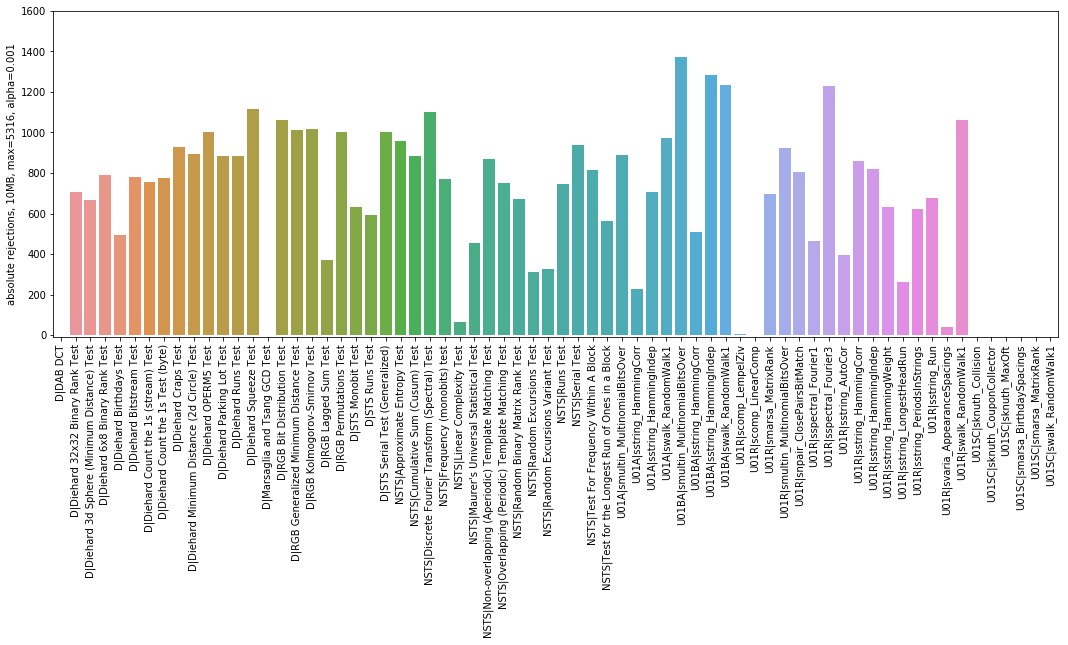

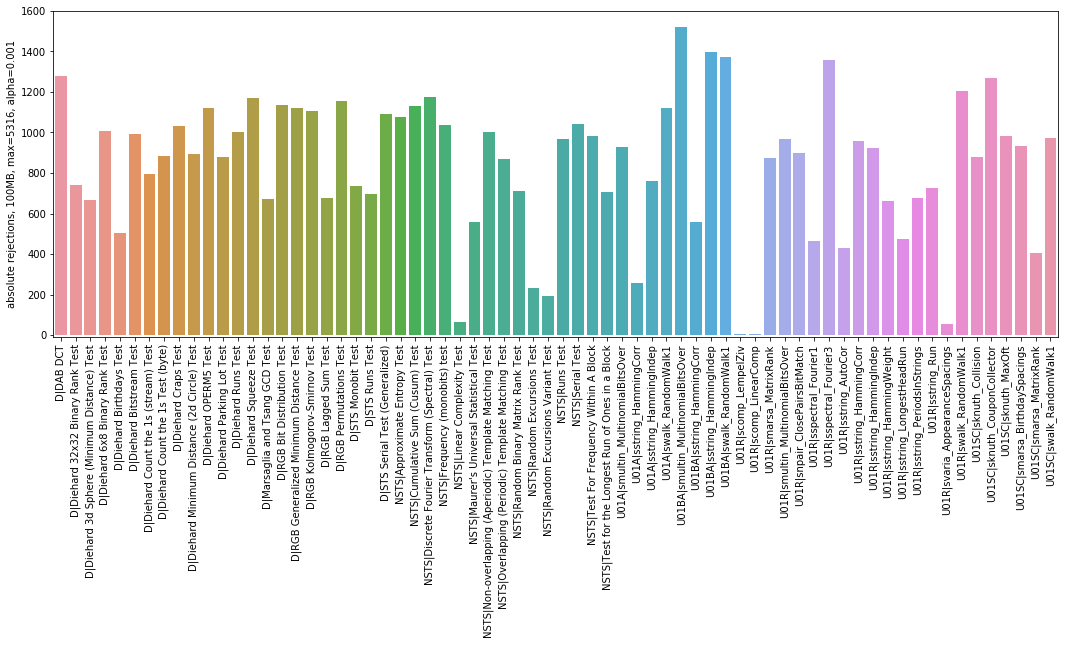

In [16]:
def renderDetections(tests_srt, selection, alpha=0.01, desc='', data_src=lambda x: x[1], ylim=None, fname=None, x_data=None):
    tests_detections = get_detections(project_tests(tests_srt, selection), alpha)
    fig, ax = pyplot.subplots(figsize=(6*3, 2*3))
    ax.tick_params(axis='x', labelrotation=90)
    
    x_data_orig = [x[0] for x in tests_detections]
    y_data = [data_src(x) for x in tests_detections]
    x_data, y_data = fill_x_data(x_data_orig, y_data, x_data, lambda x: -1) if x_data else (x_data_orig, y_data)
    #for ix, x in enumerate(x_data):
    #    print('  %s: %s' % (x, y_data[ix]))
    sns.barplot(x=[shortenTest(x) for x in x_data], y=y_data)
    
    # plt.legend(loc='best')
    ax.set_ylabel("%s, alpha=%s" % (desc, alpha))  
    if ylim:
        ax.set_ylim(ylim)
        if max(y_data) > ylim[1]:
            print('!! Warning! your y-limit is lower than maximal data point, %s, max %s' % (ylim[1], max(y_data)))
    if fname:
        #plt.tight_layout()
        plt.savefig(fname, bbox_inches='tight', dpi=400)
    
#############
#renderDetections(tests_srt, tf_10mib, 1e-3, 'relative rejections, 10MB', data_src=lambda x: x[1])
renderDetections(tests_srt, tf_10mib, 1e-3, 'absolute rejections, 10MB, max=%s' % len(tests_srt[0][1]), 
                 data_src=lambda x: x[2], ylim=[-10, 1600], fname='/tmp/absrej_10mb_1e-3.pdf',
                 x_data=[x[0] for x in project_tests(tests_srt, tf_all)])
renderDetections(tests_srt, tf_100mib, 1e-3, 'absolute rejections, 100MB, max=%s' % len(tests_srt[0][1]), 
                data_src=lambda x: x[2], ylim=[-10, 1600], fname='/tmp/absrej_100mb_1e-3.pdf',
                x_data=[x[0] for x in project_tests(tests_srt, tf_all)])

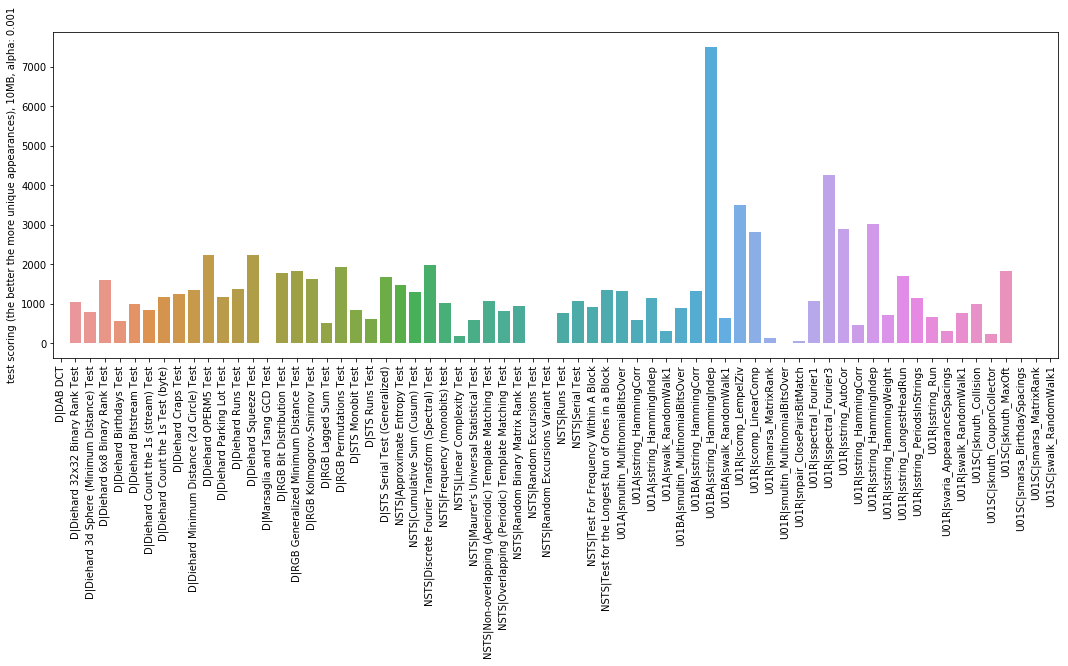

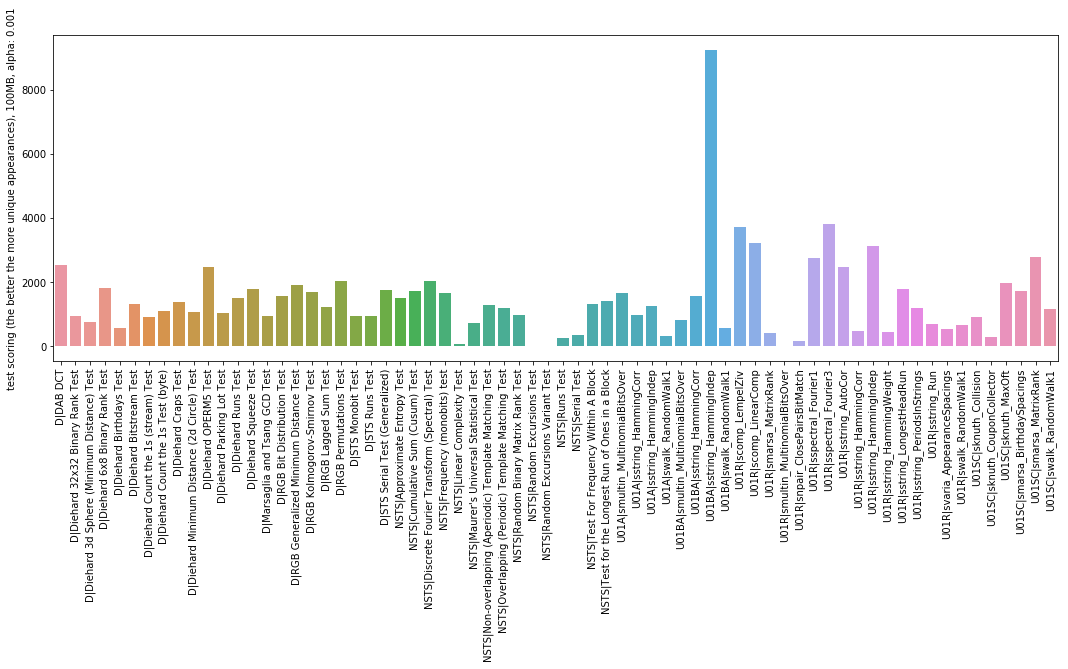

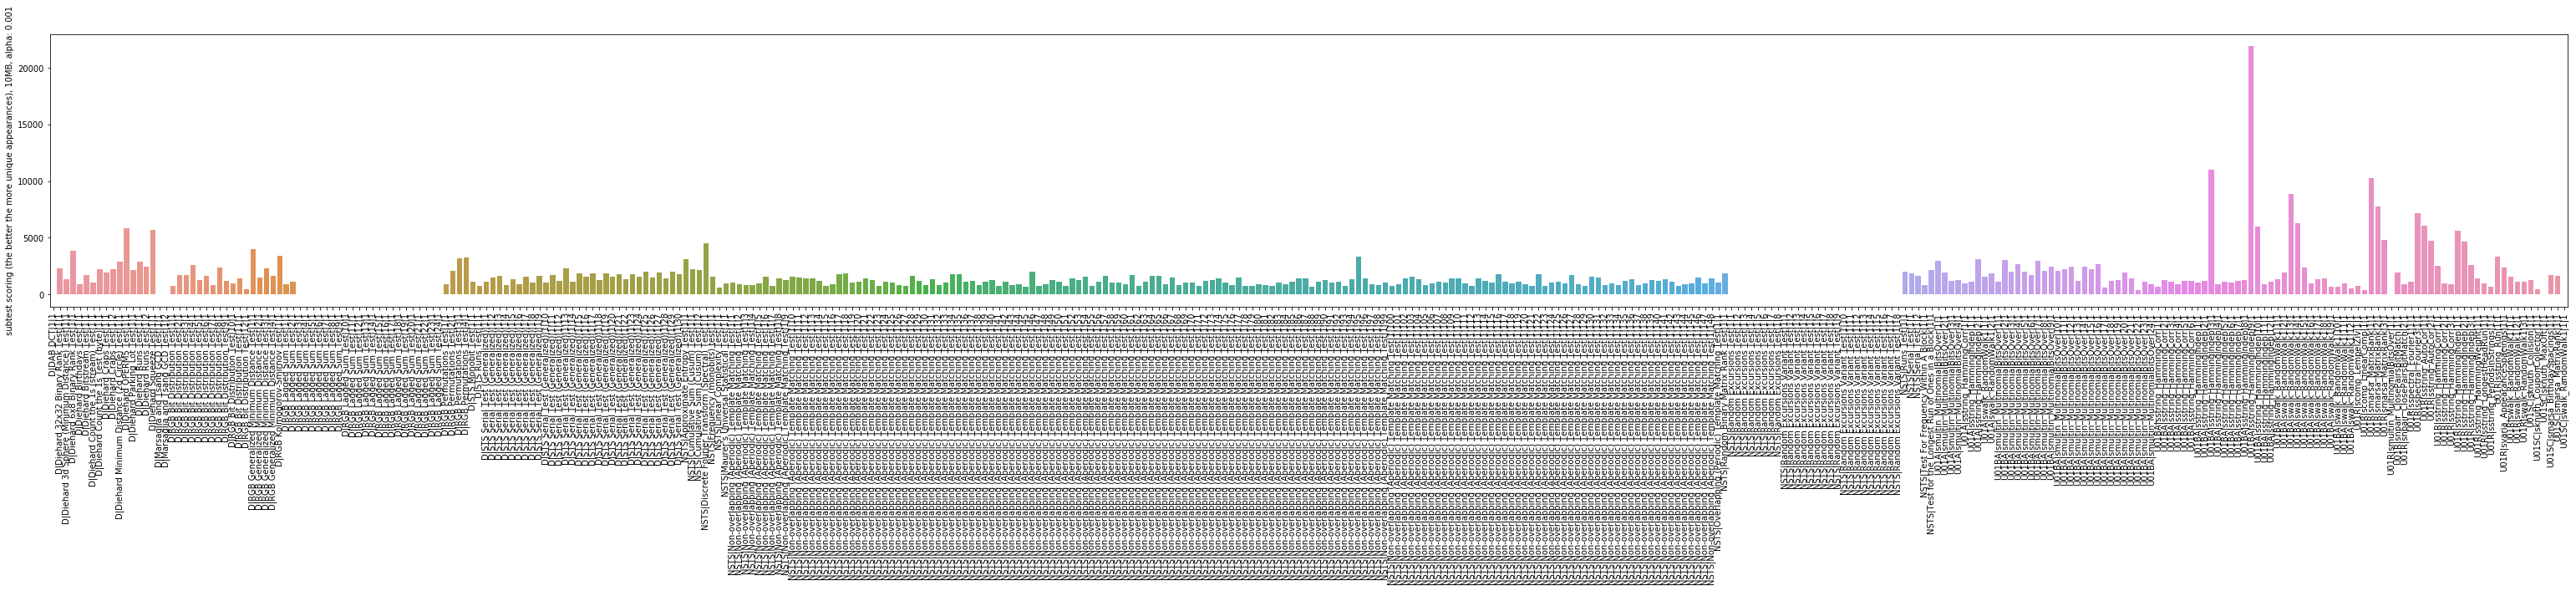

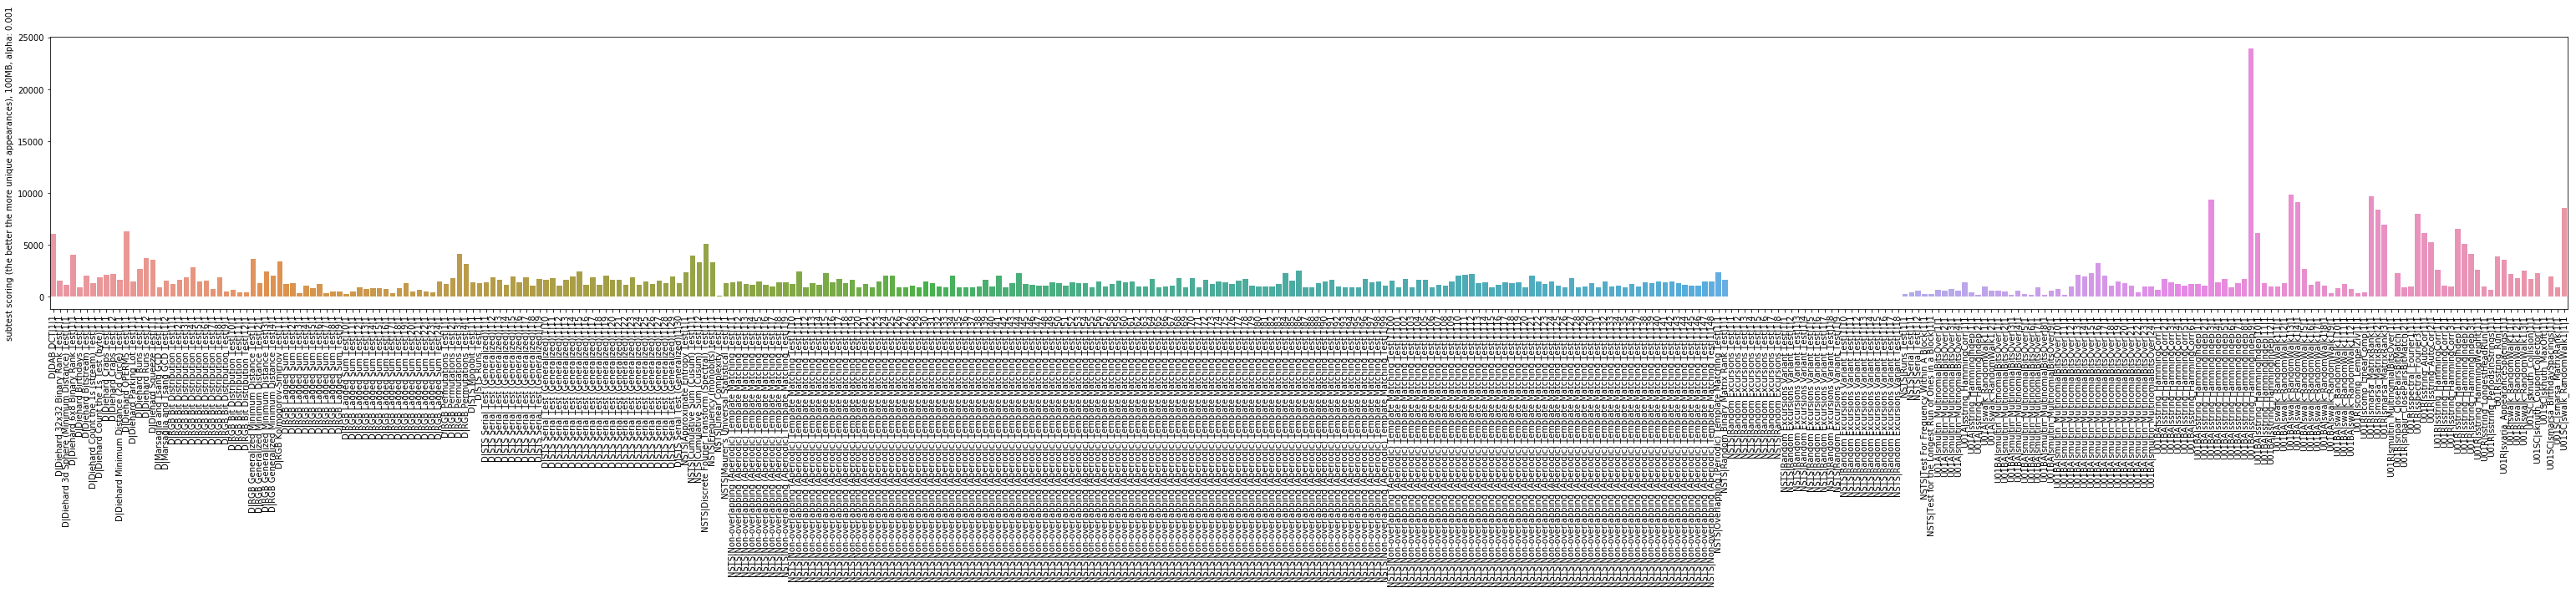

In [21]:
# T1 test uniqueness scoring
def renderTestScoring(test_analysis, desc=None, ylim=None, fname=None, x_data=None, rwidth=1.0):
    fig, ax = pyplot.subplots(figsize=(rwidth*6*3, 2*3))
    ax.tick_params(axis='x', labelrotation=90)
    filtered_tests = filterTests(test_analysis.ctests)
    x_data_orig = [x[0] for x in filtered_tests]
    y_data = [test_analysis.tests_scoring1[x] for x in range(len(filtered_tests))]
    x_data, y_data = fill_x_data(x_data_orig, y_data, x_data, lambda x: -1) if x_data else (x_data_orig, y_data)
    sns.barplot(x=[shortenTest(x) for x in x_data], y=y_data)
    desc_def = 'test scoring (the better the more unique appearances)'
    ax.set_ylabel("%s, alpha: %s" % (desc if desc else desc_def, test_analysis.alpha))
    
    if ylim:
        ax.set_ylim(ylim)
        if max(y_data) > ylim[1]:
            print('!! Warning! your y-limit is lower than maximal data point, %s, max %s' % (ylim[1], max(y_data)))
    if fname:
        #plt.tight_layout()
        plt.savefig(fname, bbox_inches='tight', dpi=400)
    
###########################
x_data=[x[0] for x in project_tests(tests_srt, tf_all)]
x_sdata=[x[0] for x in project_tests(subtests_srt, tf_all)]
renderTestScoring(test_analysis10, desc='test scoring (the better the more unique appearances), 10MB', x_data=x_data, fname='/tmp/uniqScoreTest10.pdf')
renderTestScoring(test_analysis100, desc='test scoring (the better the more unique appearances), 100MB', x_data=x_data, fname='/tmp/uniqScoreTtest100.pdf')
renderTestScoring(subtest_analysis10, desc='subtest scoring (the better the more unique appearances), 10MB', x_data=x_sdata, fname='/tmp/uniqScoreSubtest10.pdf', rwidth=3.)
renderTestScoring(subtest_analysis100, desc='subtest scoring (the better the more unique appearances), 100MB', x_data=x_sdata, fname='/tmp/uniqScoreSubtest100.pdf', rwidth=3.)

In [26]:
# TODO: filter top 3 strongest and top 3 lowest tests, 10, 100 and 8 GB

In [27]:
#loader.batteries[20010].tests[200545].variants[501513].sub_tests[1081150].stats
#loader.batteries[20010].tests[200545].summarized_pvals

Total detections: 361488, defined: 339047
Alpha: 0.00100000, detections: 101424, relative: 0.29914436641527575
Alpha: 0.00500000, detections: 104606, relative: 0.3085294959105965
Alpha: 0.01000000, detections: 107258, relative: 0.31635142030455954
Alpha: 0.05000000, detections: 118858, relative: 0.35056496591917935
Alpha: 0.10000000, detections: 132016, relative: 0.38937374464307306
Alpha: 0.25000000, detections: 164563, relative: 0.48536928508436883
Alpha: 0.50000000, detections: 217307, relative: 0.6409347376617401
Alpha: 0.75000000, detections: 271097, relative: 0.7995853082316021
Alpha: 1.00000000, detections: 339047, relative: 1.0


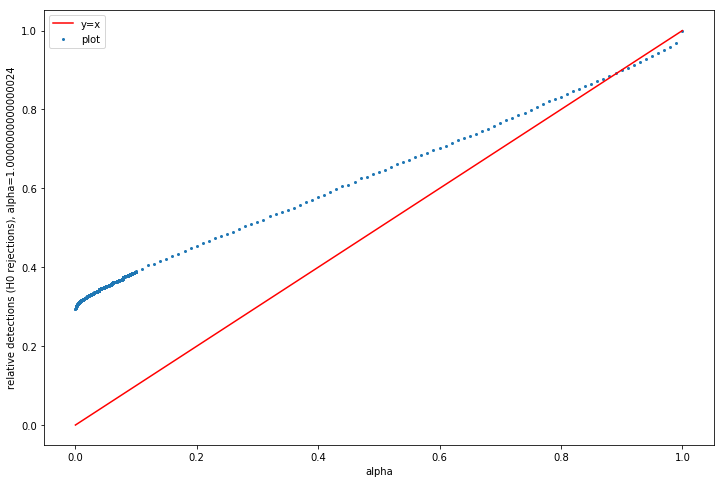

In [235]:
def renderPvalGraph(tests_srt, selection, step=0.0001, alpha=0.0001, desc=None, alpha_top=1.0):
    ctests = project_tests(tests_srt, selection)
    total_det = sum(selection) * len(tests_srt)
    tests_undefined = collections.defaultdict(lambda: 0)  # tname -> # of NONE in test
    total_def_det = 0

    # Fails removal & report
    for tname, tvals in ctests:
        for idx, tval in enumerate(tvals):
            if tval is None:
                eidx = get_ex_byidx(selection, idx)
                tests_undefined[tname] += 1
                #print('%s : %s' % (tname, exps[eidx].name))
            else:
                total_def_det += 1

    print('Total detections: %s, defined: %s' % (total_det, total_def_det))


    x_data = []
    y_data = []
    while alpha <= alpha_top:
        alpha += step

        tests_detections = [(x[0], sum(1 for y in x[1] if y is not None and y < alpha)) for x in ctests]
        detections = sum([x[1] for x in tests_detections])

        if min([abs(alpha - x) for x in [0.005, 0.001, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1.]]) <= 0.000001:
            print('Alpha: %0.8f, detections: %s, relative: %s' % (alpha, detections, float(detections)/total_def_det if total_def_det > 0 else 0))
        if alpha > 0.1:
            step = 0.005

        x_data.append(alpha)
        #y_data.append(float(detections))
        #y_data.append(alpha / (float(detections)/total_def_det))
        #y_data.append((float(detections)/total_def_det) / alpha)
        y_data.append((float(detections)/total_def_det) if total_def_det else 0)

    fig, ax = pyplot.subplots(figsize=(6*2, 4*2))
    plt.scatter(x_data, 
                y_data, 
                label='plot', s=4)
    plt.plot(x_data, x_data, label='y=x', color='red')
    plt.legend(loc='best')  # plt.tick_params(labelsize=14)
    ax.set_xlabel("alpha")
    ax.set_ylabel("relative detections (H0 rejections)%s, alpha=%s" % (', ' + desc if desc else '', alpha))
    # TODO: compute KS

############
renderPvalGraph(tests_srt, tf_all, 0.0001, 1e-4)

## Vertical scoring

In [29]:
# Idea: work in the test matrix in columns, count number of test reports per data set and assign points.
# Tests ranking results together.
# T1: per data: score tests. N points, divide between activated tests
# T2: per data: add tests to the set. if set exists, increment number. Which are the most often sets?
# T3: per data: triangular matrix of N tests. add +1 to a test which fired together. Which are the most firing tests?

In [17]:
exps[0].exp_info.id

26

In [125]:
# Scoring by rounds achieved
def round_scoring(exps, tests_srt, selection, alpha=0.01, desc=None, gwidth=1.0):
    ctests = filterTests(project_tests(tests_srt, selection))
    total_det = sum(selection) * len(tests_srt)
    tests_undefined = collections.defaultdict(lambda: 0) 
    num_tests = len(ctests)
    expmap = {x.id: x for x in exps}
    
    # Manual outlier test
    if False:
        for x in ctests:
            print('%s: %s' % (x[0], sum([1 for y in x[1] if y is not None])))
            if 'scomp_LinearComp' in x[0]:
                print(x)
        return

    fnc_rounds = get_rounds(exps)
    f2r = collections.defaultdict(lambda: [])  # fname -> rounds[] -> exp IDs
    for ix, x in enumerate(exps):
        f2r[x.exp_info.fnc_name].append((x, ix))

    f2r_map = {fname: sorted(f2r[fname], key=lambda x: (x[0].exp_info.fnc_round, x[0].exp_info.meth)) for fname in f2r}

    # testidx -> fname -> top round achieved
    TEST_ROUNDS_NO_DATA = -10  # no pvalue was found for (test, fname) 
    TEST_ROUNDS_NO_ROUND = -1  # (test, fname) has data, but >= alpha for each tested round
    test_rounds = collections.defaultdict(
        lambda: collections.defaultdict(
            lambda: TEST_ROUNDS_NO_DATA))
    
    fnc_rejected_rounds = collections.defaultdict(lambda: -1)
    test_occurences = collections.defaultdict(lambda: 0)
    test_undefined = collections.defaultdict(lambda: 0)
    test_undefineds = collections.defaultdict(lambda: [])
    test_defined = collections.defaultdict(lambda: 0)
    test_detected = collections.defaultdict(lambda: 0)
    data_rounds = collections.defaultdict(lambda: [0,0,[]])  # expid -> (# tests checked, # tests rejects)

    for fname in f2r_map:
        for exp, exid in f2r_map[fname]:
            nexid = get_ex_newidx(selection, exid)  # after compression by selection
            if nexid is None:
                continue
                
            fround = exp.exp_info.fnc_round
            for testid in range(len(ctests)):
                tname = ctests[testid][0]
                pvals = ctests[testid][1]
                
                test_occurences[testid] += 1
                if pvals[nexid] is None:
                    test_undefined[testid] += 1
                    test_undefineds[testid].append(exp)
                else:
                    test_defined[testid] += 1
                
                if pvals[nexid] is not None:
                    if pvals[nexid] < alpha:
                        test_detected[testid] += 1
                        test_rounds[testid][fname] = max(fround, test_rounds[testid][fname])
                        fnc_rejected_rounds[fname] = max(fround, fnc_rejected_rounds[fname])
                    else:
                        test_rounds[testid][fname] = max(TEST_ROUNDS_NO_ROUND, test_rounds[testid][fname])
                    
                if pvals[nexid] is not None:
                    data_rounds[exp.id][0] += 1
                    if pvals[nexid] < alpha:
                        data_rounds[exp.id][1] += 1
                    data_rounds[exp.id][2].append((tname, pvals[nexid]))
    
    #
    # Dump: experiment -> pass/fail table
    #
    data_expids = sorted(list(data_rounds.keys()), key=lambda x: (
        expmap[x].exp_info.fnc_name, 
        expmap[x].exp_info.size, 
        expmap[x].exp_info.fnc_round, 
        expmap[x].exp_info.meth,
        expmap[x].exp_info.seed,
    ))
    
    exp_name_extractor = lambda x: (x.id, 
                           x.exp_info.id,
                           x.exp_info.fnc_name, 
                           x.exp_info.osize,
                           x.exp_info.fnc_round, 
                           x.exp_info.meth,
                           x.exp_info.seed[0:4])
    
    exp_namer = lambda x: '%s-e%s-%s-%s-r%s-%s-%s' % exp_name_extractor(x)
    
    data_round_groups = []
    data_round_groups_meta = []
    for k,g in itertools.groupby(data_expids, key=lambda x: (expmap[x].exp_info.fnc_name, expmap[x].exp_info.size)):
        data_round_groups.append(list(g))
        data_round_groups_meta.append(k)
    
    print('Grouping: %s' % data_round_groups_meta[0:4])
    print('Experiments: test rejections / all tests with alpha: %s' % alpha)
    data_rounds_agg = []
    data_rounds_txt = []
    data_rounds_total = 0
    data_rounds_graph = [[]]
    for grpidx, grp in enumerate(data_round_groups):
        #if len(data_rounds_graph[-1]) + len(grp) > 100:
        data_rounds_graph.append([])
            
        cgraph = data_rounds_graph[-1]
        for ix, expid in enumerate(grp):
            exp = expmap[expid]
            dt = data_rounds[expid]
            name_full = exp_namer(exp)
            name = '\n'.join(wrapHyphened(name_full, 50))
            cgraph.append([name, dt[1]/float(dt[0])])
            cline = ('%s .. %s / %s' % (name_full, dt[1], dt[0]))
            data_rounds_txt.append(cline)
            # print(cline)
            
            data_rounds_total += 1
            data_rounds_agg.append({
                'id':            exp.id, 
                'eid':           exp.exp_info.id,
                'fnc':           exp.exp_info.fnc_name, 
                'osize':         exp.exp_info.osize,
                'size':          exp.exp_info.size,
                'round':         exp.exp_info.fnc_round, 
                'method':        exp.exp_info.meth,
                'seed':          exp.exp_info.seed,
                'test_rej': dt[1],
                'test_all': dt[0],
                'test_res': dt[2],
            })
        
        #if data_rounds_total > 20:
        #    break
    
    fname_component = '-'.join(['e%s' % x for x in exp_id_list])
    data_rounds_graph = [x for x in data_rounds_graph if x]
    #json.dump(data_rounds_agg, open('/tmp/exps_data-%s.json' % fname_component, 'w+'), indent=2)
    #open('/tmp/exps_data-%s.txt' % fname_component, 'w+').write('\n'.join(data_rounds_txt))
    # print(json.dumps(data_rounds_graph, indent=2))    
    # print(json.dumps(data_rounds_agg, indent=2))    
    
    print('Function: max round achieved: [')
    for fname in sorted(list(fnc_rejected_rounds.keys())):
        print('  ["%s": %s],' % (fname, fnc_rejected_rounds[fname]))
    print(']')

    #
    # Input data graphing
    #
    if False:
        graphs_per_page = 6
        with PdfPages('/tmp/exps_rounds_multi-%s.pdf' % fname_component) as pdf:
            for cidx, cchunk in enumerate(doChunks(data_rounds_graph, graphs_per_page)):
                fig, axes = pyplot.subplots(nrows=len(cchunk), ncols=1,
                                            figsize=(16*3, len(cchunk)*8))

                for ix, cgraph in enumerate(cchunk):
                    cgroup_meta = data_round_groups_meta[ix + graphs_per_page * cidx]
                    cax = axes[ix] if len(cchunk) > 1 else axes
                    cax.tick_params(axis='x', labelrotation=0, labelsize=20)
                    cax.set_ylim([0, 1])

                    xlabels = ['\n'.join(wrapHyphened(x[0], 10)) for x in cgraph]
                    sns.barplot(x=xlabels, y=[x[1] for x in cgraph], ax=cax)
                    cax.set_ylabel("Relative rejections @ alpha %s, %s %s MB" % (alpha, cgroup_meta[0], int(cgroup_meta[1]/1024/1024)))

                plt.tight_layout()
                pdf.savefig()
                # plt.tight_layout()
                # plt.savefig("/tmp/exps_rounds_%02d-%s.pdf" % (cidx, fname_component), dpi=300)
                plt.close()

        # plt.tight_layout()
        # plt.savefig("/tmp/exps_rounds.pdf", bbox_inches='tight', dpi=300)
        # plt.savefig("/tmp/exps_rounds.png", bbox_inches='tight', dpi=300)
        #return
    print('Round phase finished')

    # Test scoring    
    max_points = 0
    for fname in f2r_map:
        fr = fnc_rounds[fname]
        maxr = max(fr)
        minr = min(fr)
        max_points += 1 + (maxr - minr)
    print('Max points: %s' % max_points)
    
    tis = collections.defaultdict(lambda: [])
    for fname in f2r_map:
        fr = fnc_rounds[fname]
        maxr = max(fr)
        minr = min(fr)   
        maxdet = max([test_rounds[testid][fname] for testid in range(len(ctests))])
        tis['%s|r%s' % (fname, maxdet)] = [t[0] for ix, t in enumerate(ctests) if test_rounds[ix][fname] == maxdet]
    #print(json.dumps(tis, indent=2))
    
    #print(json.dumps(test_rounds, indent=2))
    tests_scoring_r = collections.defaultdict(lambda: 0)
    for fname in f2r_map:
        fr = fnc_rounds[fname]
        maxr = max(fr)
        minr = min(fr)        
        for testid in range(len(ctests)):
            tname = ctests[testid][0]
            if not test_rounds[testid][fname]:
                print('    Skipped: %s, %s' % (fname, shortenTest(tname)))
                continue
            if test_rounds[testid][fname] == TEST_ROUNDS_NO_DATA:
                print('!!  Not tested: %s %s' % (fname, shortenTest(tname)))
                continue
            if test_rounds[testid][fname] == TEST_ROUNDS_NO_ROUND:
                print(' .. No round detected: %s %s' % (fname, shortenTest(tname)))
                continue
            points = 1 * (1 + (test_rounds[testid][fname] - minr))
            tests_scoring_r[tname] += points
            
    #print(json.dumps(tests_scoring_r, indent=2))
    print('Test scoring: test name -> scoring result')
    for x in sorted(tests_scoring_r.keys()):
        print('%s: %s' % (shortenTest(x), tests_scoring_r[x]))
    
    fig, ax = pyplot.subplots(figsize=(6*3*gwidth, 3*3))
    ax.tick_params(axis='x', labelrotation=90)
    
    acc_data = [(shortenTest(x[0]), tests_scoring_r[x[0]]) for x in ctests]
    acc_data.sort(key=lambda x: (x[1], x[0]))

    #sns.barplot(x=[x[0] for x in ctests], y=[tests_scoring_r[x[0]] for x in ctests])
    sns.barplot(x=[x[0] for x in acc_data], y=[x[1] for x in acc_data])
    ax.set_ylabel("test scoring (on detected function rounds)%s, alpha=%s" % ((' ' + desc if desc else ''),alpha))
    
    for ix, x in enumerate(ctests):
        print('Records: %s  Undefined: %s Defined: %s Detections: %s %s  %s' 
              % (test_occurences[ix], test_undefined[ix], test_defined[ix], test_detected[ix], x[0],
                 json.dumps([str(x) for x in test_undefineds[ix]], indent=2)))
    
    plt.tight_layout()
    #plt.savefig("/tmp/sorted.png", bbox_inches='tight', dpi=800)
    plt.savefig("/tmp/sorted.pdf", bbox_inches='tight', dpi=400)

Grouping: [('AES', 10485760), ('AES', 104857600), ('ARIA', 10485760), ('ARIA', 104857600)]
Experiments: test rejections / all tests with alpha: 0.0001
Function: max round achieved: [
  ["AES": 4],
  ["ARIA": 2],
  ["ARIRANG": 5],
  ["BLAKE": 3],
  ["BLOWFISH": 4],
  ["Boole": 4],
  ["CAMELLIA": 3],
  ["CAST": 4],
  ["CHASKEY": 4],
  ["Cheetah": 6],
  ["DCH": 4],
  ["DynamicSHA2": 17],
  ["ECHO": 8],
  ["FANTOMAS": 5],
  ["GOST": 10],
  ["Gost": 5],
  ["HIGHT": 10],
  ["Hamsi": 1],
  ["IDEA": 3],
  ["JH": 6],
  ["KASUMI": 5],
  ["KUZNYECHIK": 3],
  ["Keccak": 4],
  ["LBLOCK": 10],
  ["LEA": 10],
  ["LED": 5],
  ["Lesamnta": 5],
  ["Luffa": 10],
  ["MD5": 19],
  ["MD6": 10],
  ["MISTY1": 1],
  ["NOEKEON": 3],
  ["PICCOLO": 6],
  ["PRIDE": 7],
  ["PRINCE": 6],
  ["RC5-20": 7],
  ["RC6": 6],
  ["RECTANGLE-K128": 8],
  ["RECTANGLE-K80": 8],
  ["RIPEMD160": 14],
  ["ROAD-RUNNER-K128": 3],
  ["ROAD-RUNNER-K80": 4],
  ["ROBIN": 4],
  ["ROBIN-STAR": 4],
  ["SEED": 2],
  ["SERPENT": 4],
  ["SHA1

 .. No round detected: KUZNYECHIK U01BA|smultin_MultinomialBitsOver|9|1
 .. No round detected: KUZNYECHIK U01BA|smultin_MultinomialBitsOver|10|1
 .. No round detected: KUZNYECHIK U01BA|smultin_MultinomialBitsOver|11|1
 .. No round detected: KUZNYECHIK U01BA|smultin_MultinomialBitsOver|12|1
 .. No round detected: KUZNYECHIK U01BA|smultin_MultinomialBitsOver|15|1
 .. No round detected: KUZNYECHIK U01BA|smultin_MultinomialBitsOver|16|1
 .. No round detected: KUZNYECHIK U01BA|smultin_MultinomialBitsOver|17|1
 .. No round detected: KUZNYECHIK U01BA|smultin_MultinomialBitsOver|18|1
 .. No round detected: KUZNYECHIK U01BA|smultin_MultinomialBitsOver|21|1
 .. No round detected: KUZNYECHIK U01BA|smultin_MultinomialBitsOver|22|1
 .. No round detected: KUZNYECHIK U01BA|smultin_MultinomialBitsOver|24|1
 .. No round detected: KUZNYECHIK U01BA|sstring_HammingCorr|1|1
 .. No round detected: KUZNYECHIK U01BA|sstring_HammingCorr|2|1
 .. No round detected: KUZNYECHIK U01BA|sstring_HammingCorr|3|1
 .. No

 .. No round detected: SPECK D|RGB Bit Distribution Test|11|1
 .. No round detected: SPECK D|RGB Bit Distribution Test|12|1
 .. No round detected: SPECK D|RGB Lagged Sum Test|8|1
 .. No round detected: SPECK D|RGB Lagged Sum Test|9|1
 .. No round detected: SPECK D|RGB Lagged Sum Test|12|1
 .. No round detected: SPECK D|RGB Lagged Sum Test|13|1
 .. No round detected: SPECK D|RGB Lagged Sum Test|16|1
 .. No round detected: SPECK D|RGB Lagged Sum Test|17|1
 .. No round detected: SPECK D|RGB Lagged Sum Test|19|1
 .. No round detected: SPECK D|RGB Lagged Sum Test|21|1
 .. No round detected: SPECK D|RGB Lagged Sum Test|23|1
 .. No round detected: SPECK D|RGB Lagged Sum Test|24|1
 .. No round detected: SPECK NSTS|Linear Complexity Test|1|1
 .. No round detected: SPECK U01A|sstring_HammingCorr|1|1
 .. No round detected: SPECK U01BA|smultin_MultinomialBitsOver|22|1
 .. No round detected: SPECK U01BA|sstring_HammingCorr|4|1
 .. No round detected: SPECK U01BA|sstring_HammingCorr|5|1
 .. No round 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



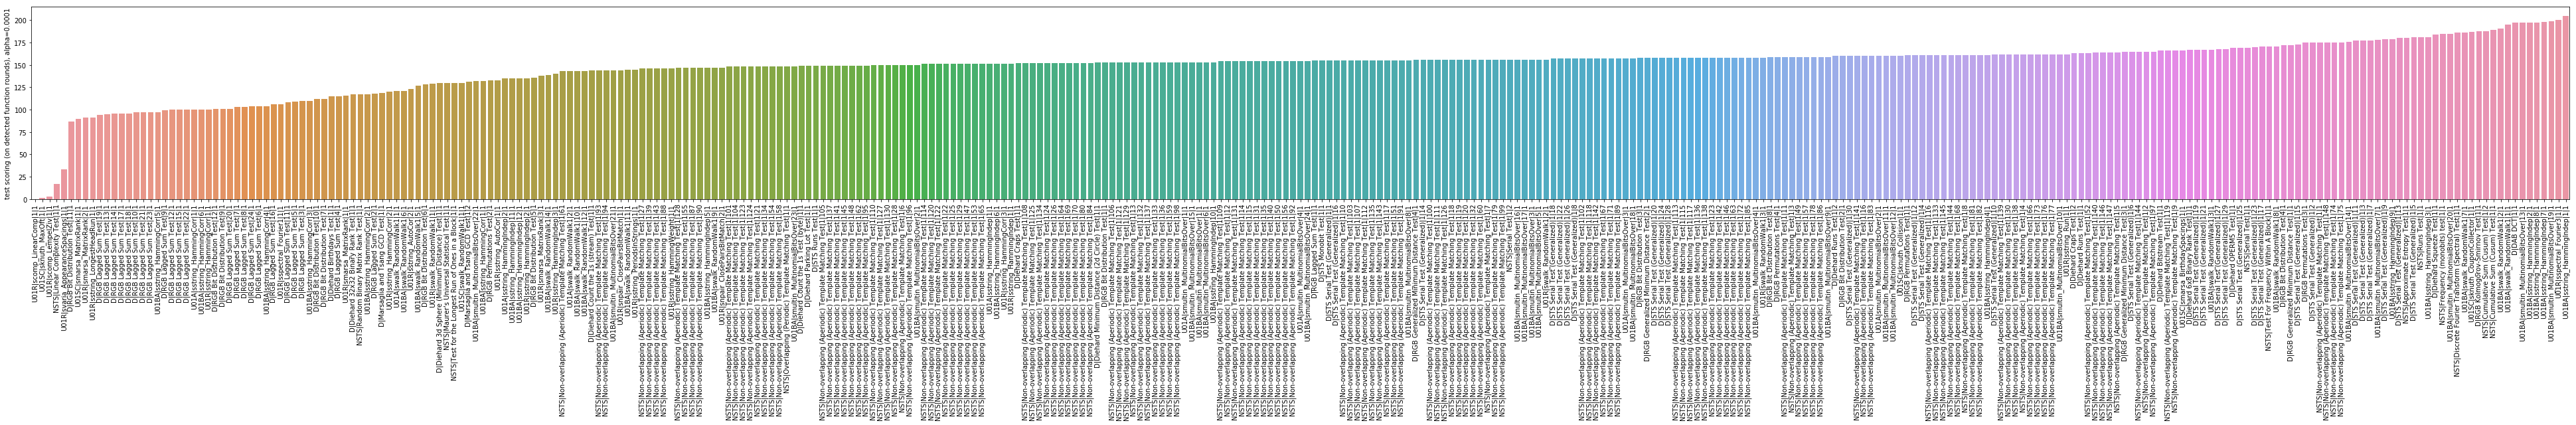

In [126]:
round_scoring(exps, subtests_srt, tf_all, alpha=1e-4, desc='', gwidth=3.0)  # tf_8gib

In [31]:
#[x[0] for x in tests_srt]

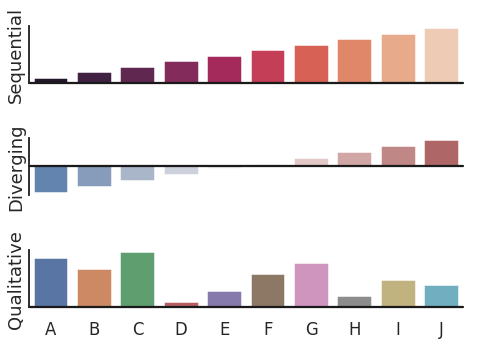

In [41]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

# Generate some sequential data
x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
y2 = y1 - 5.5
sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Diverging")

# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=x, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

In [75]:
2**16

65536

In [41]:
# T2: test sets
tests_sets_l = sorted([(k, tests_sets[k]) for k in tests_sets if tests_sets[k]>=2], reverse=True)
print(tests_sets_l[:10])

[]


In [40]:
# T3: matrix

In [ ]:
print(tests_matrix_2)

In [62]:
G = nx.Graph()
G2 = Graph('G')
for t in ctests:
    G.add_node(t[0])

for i in range(len(ctests)):
    for j in range(i+1, len(ctests)):
        w = tests_matrix[i][j]
        if w < 75:
            continue
            
        print("%s - %s [%s]" % (ctests[i][0], ctests[j][0], w))
        G.add_edge(ctests[i][0], ctests[j][0], weight=w, color='green' if w<=5 else 'black', size=10 if w<=5 else 2)
        G2.edge(str(ctests[i][0]), str(ctests[j][0]), penwidth=('%s' % (w-74))) # weight=w)

#print(json.dumps([list(x) for x in nx.connected_components(G)], indent=2))

Dieharder|DAB DCT - Dieharder|Diehard 32x32 Binary Rank Test [244]
Dieharder|DAB DCT - Dieharder|Diehard 3d Sphere (Minimum Distance) Test [235]
Dieharder|DAB DCT - Dieharder|Diehard 6x8 Binary Rank Test [339]
Dieharder|DAB DCT - Dieharder|Diehard Birthdays Test [172]
Dieharder|DAB DCT - Dieharder|Diehard Bitstream Test [332]
Dieharder|DAB DCT - Dieharder|Diehard Count the 1s (stream) Test [273]
Dieharder|DAB DCT - Dieharder|Diehard Count the 1s Test (byte) [299]
Dieharder|DAB DCT - Dieharder|Diehard Craps Test [347]
Dieharder|DAB DCT - Dieharder|Diehard Minimum Distance (2d Circle) Test [300]
Dieharder|DAB DCT - Dieharder|Diehard OPERM5 Test [363]
Dieharder|DAB DCT - Dieharder|Diehard Parking Lot Test [305]
Dieharder|DAB DCT - Dieharder|Diehard Runs Test [348]
Dieharder|DAB DCT - Dieharder|Diehard Squeeze Test [397]
Dieharder|DAB DCT - Dieharder|Marsaglia and Tsang GCD Test [225]
Dieharder|DAB DCT - Dieharder|RGB Bit Distribution Test [383]
Dieharder|DAB DCT - Dieharder|RGB Generalize

NIST Statistical Testing Suite|Cumulative Sum (Cusum) Test - NIST Statistical Testing Suite|Discrete Fourier Transform (Spectral) Test [366]
NIST Statistical Testing Suite|Cumulative Sum (Cusum) Test - NIST Statistical Testing Suite|Frequency (monobits) test [364]
NIST Statistical Testing Suite|Cumulative Sum (Cusum) Test - NIST Statistical Testing Suite|Maurer's Universal Statistical Test [195]
NIST Statistical Testing Suite|Cumulative Sum (Cusum) Test - NIST Statistical Testing Suite|Non-overlapping (Aperiodic) Template Matching Test [339]
NIST Statistical Testing Suite|Cumulative Sum (Cusum) Test - NIST Statistical Testing Suite|Overlapping (Periodic) Template Matching Test [300]
NIST Statistical Testing Suite|Cumulative Sum (Cusum) Test - NIST Statistical Testing Suite|Random Binary Matrix Rank Test [231]
NIST Statistical Testing Suite|Cumulative Sum (Cusum) Test - NIST Statistical Testing Suite|Random Excursions Test [88]
NIST Statistical Testing Suite|Cumulative Sum (Cusum) Test 

In [65]:
# print(sys.path)
# print(os.environ['PATH'])
# print(os.getenv('PATH'))
G2.engine = 'circo'
#G2.engine = 'neato'
#G2.engine = 'fdp'
#G2.engine = 'osage'
###G2.engine = 'patchwork'
#G2.engine = 'sfdp'
#G2.engine = 'twopi'
G2.view()

['/home/xklinec/.pyenv/versions/3.6.5/lib/python36.zip', '/home/xklinec/.pyenv/versions/3.6.5/lib/python3.6', '/home/xklinec/.pyenv/versions/3.6.5/lib/python3.6/lib-dynload', '', '/home/xklinec/.pyenv/versions/3.6.5/lib/python3.6/site-packages', '/home/xklinec/.pyenv/versions/3.6.5/lib/python3.6/site-packages/IPython/extensions', '/home/xklinec/.ipython', '/home/xklinec/local/graphviz/bin', '/home/xklinec/local/openssl/bin']
/home/xklinec/.pyenv/versions/3.6.5/bin:/home/xklinec/.pyenv/libexec:/home/xklinec/.pyenv/plugins/python-build/bin:/home/xklinec/.pyenv/shims:/home/xklinec/.pyenv/bin:/usr/sbin:/sbin:/usr/etc:/home/xklinec/.pyenv/shims:/home/xklinec/.pyenv/bin:/home/xklinec/.pyenv/shims:/home/xklinec/.pyenv/bin:/packages/run/hugs98-032005/bin:/usr/sbin:/sbin:/usr/etc:/usr/lib64/qt-3.3/bin:/usr/local/bin:/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/sbin:/usr/share/man:/usr/X11R6/man:/usr/local/man:/packages/run/modules-2.0/bin:/packages/run.64/links/bin:/packages/run/links/bin:/home/xkl

'G.gv.pdf'

/home/xklinec/.pyenv/versions/3.6.5/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


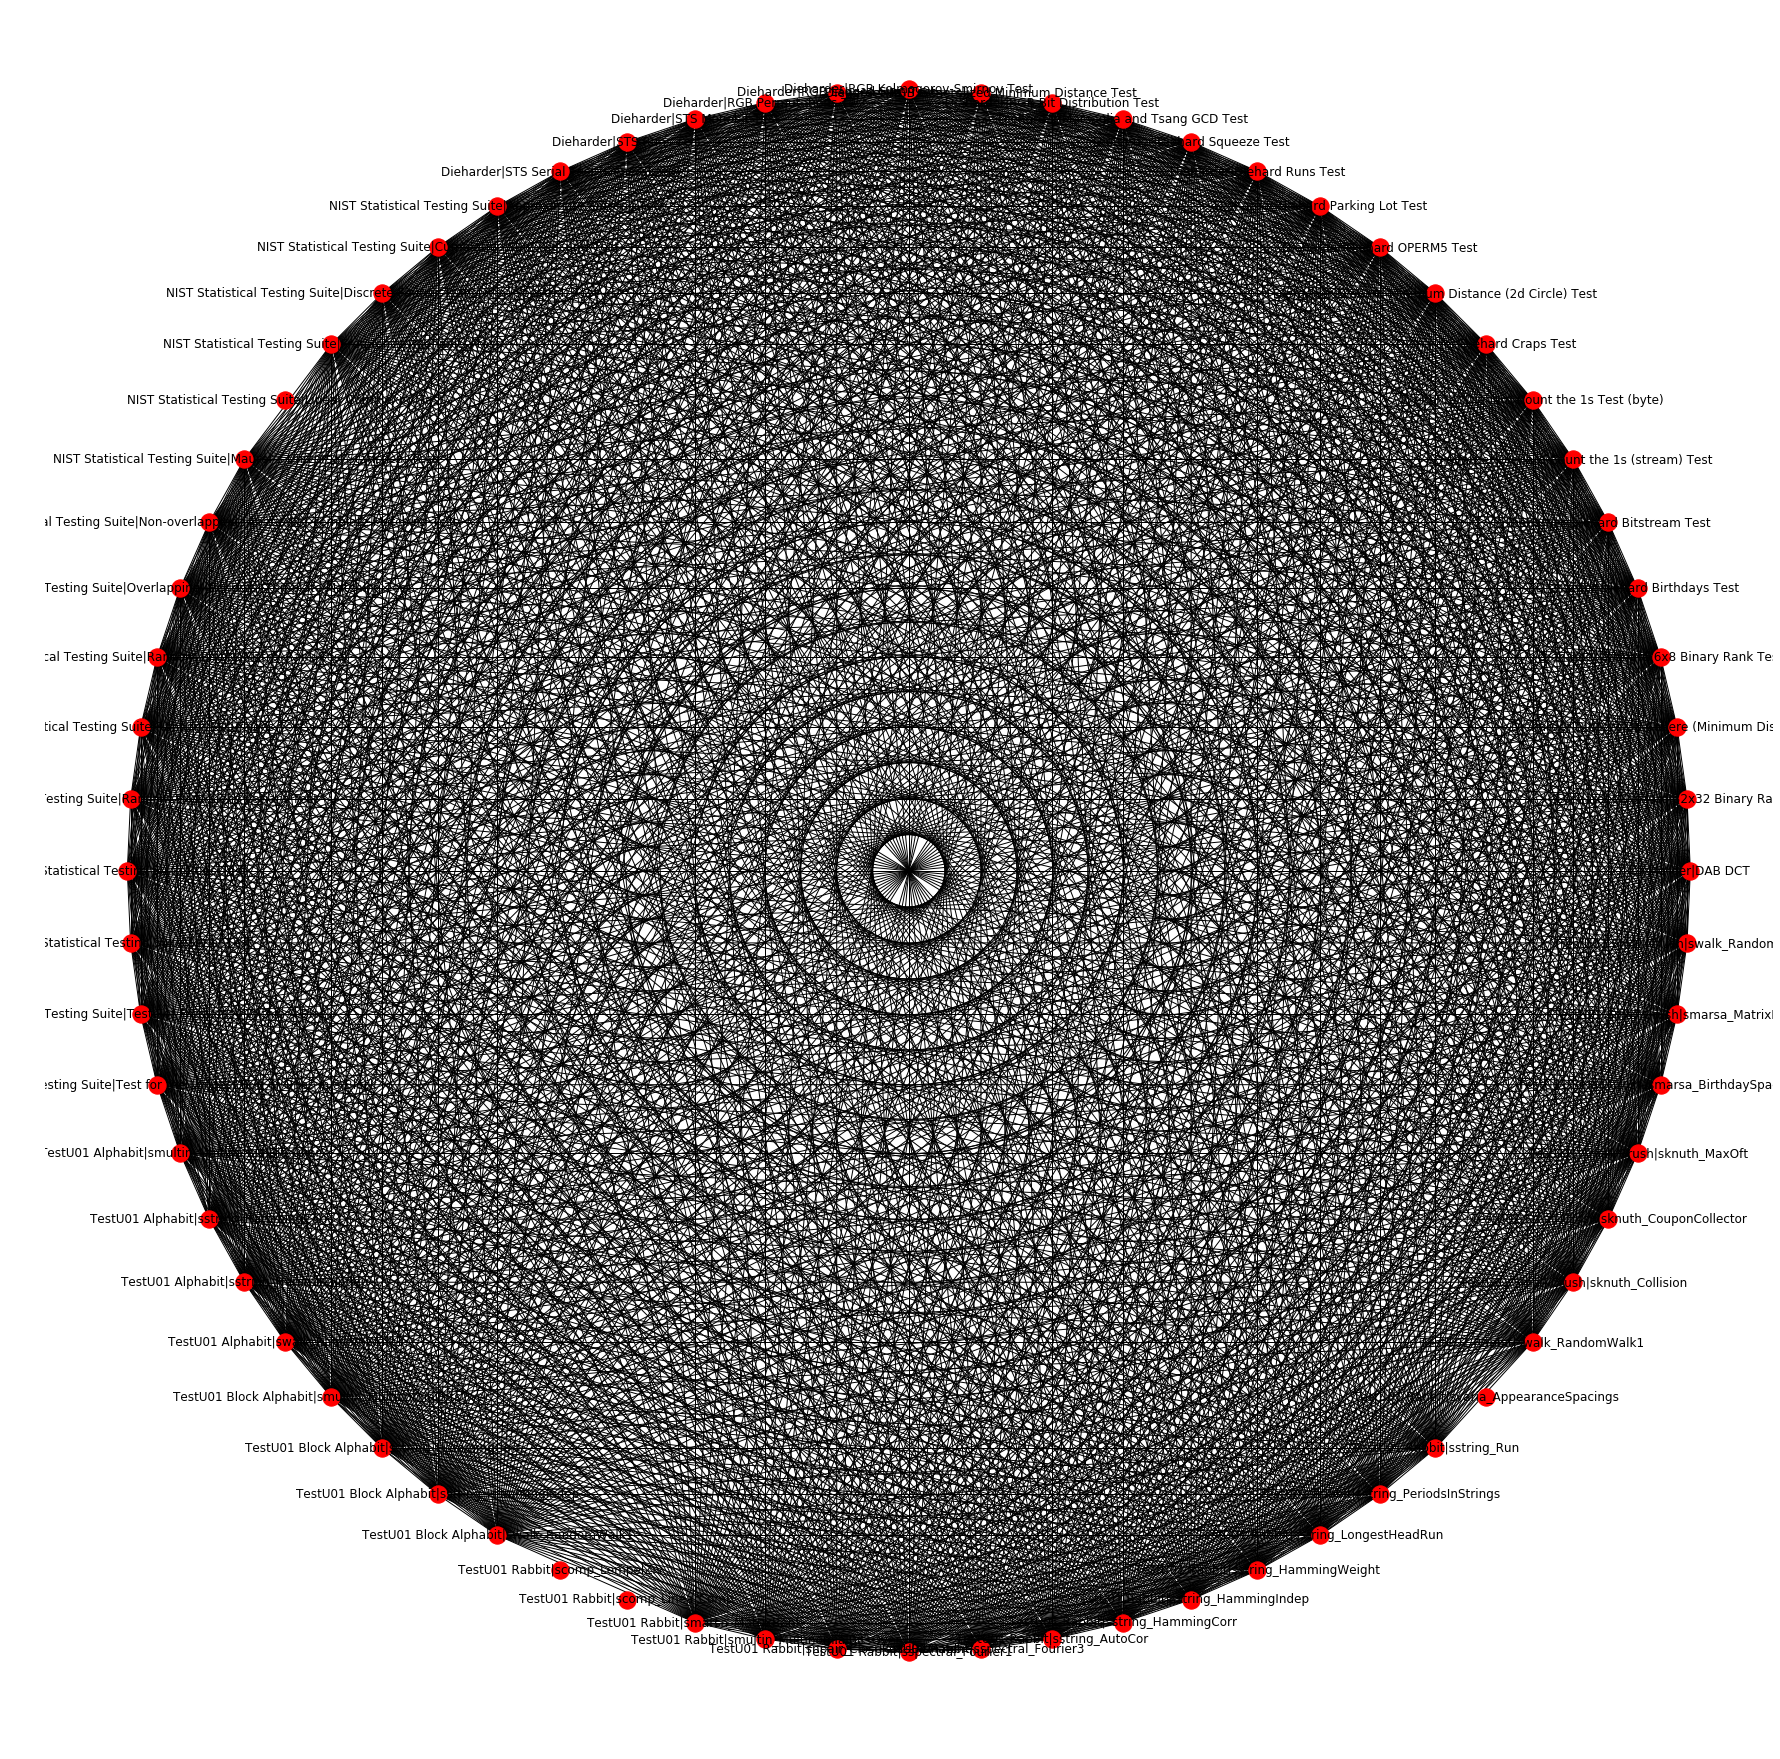

In [30]:
plt.figure(figsize=(24, 24))
#nx.draw_networkx(G, with_labels=True)
#nx.draw(G, with_labels=True)
nx.draw(G, with_labels=True, pos=nx.circular_layout(G))
#nx.draw(G, with_labels=True, pos=nx.kamada_kawai_layout(G))
#nx.draw(G, with_labels=True, pos=nx.shell_layout(G, shells))
#nx.draw(self.G, with_labels=True, pos=mylay(self.shells))
#plt.savefig("/tmp/deps.png", dpi=400)

In [41]:
# SIDAK TEST
alpha= 0.0085 #.015  # .005
pvals=[.03, .5, .21, ] + [0.001, 0.11, 0.99,]
nvals=[.07, .02, .002009, 0.98, 0.55,   0.0001 ]
ns_ex=sidak_alpha(alpha, len(nvals))
ns_cp=sidak_alpha(min(nvals), len(nvals))
nsicp=sidak_inv(min(nvals), len(nvals))
         
print('alpha: %s' % alpha)
print('min p: %s' % min(nvals))
print('sh  t: %s, %s' % (ns_ex, min(nvals) < ns_ex))
print('shi p: %s, %s' % (nsicp, nsicp < alpha))
print('')

t1 = pvals+nvals
a1 = sidak_alpha(alpha, len(t1))
print(min(t1), a1, min(t1) < a1, len(t1), "\n")

t2 = pvals+[sidak_inv(min(nvals), len(nvals))]
a2 = sidak_alpha(alpha, len(t2))
print(min(t2), a2, min(t2) < a2, len(t2), "\n")

dexp = (len(t1)) / (len(pvals)+1.)
Y = 1-(1-min(t1))**(dexp)
t3 = pvals+[Y]
a3 = sidak_alpha(alpha, len(t3))
print(Y)
print(min(t3), a2, min(t3) < a3, len(t3), "\n")
#print(sidak_inv(0.1, 5))
#print(sidak_inv(0.01, 5))

#random.shuffle(t1)
print('='*80)
print('LEN: %s' % len(t1))
ideal = merge_pvals(t1, 999)
print('M: ', ideal) # FULL merge
#ammend(t1)
#print('M: ', merge_pvals(t1, 999)) # FULL merge
print('M: ', merge_pvals(t1, 2))
print('M: ', merge_pvals(t1, 3))
print('M: ', merge_pvals(t1, 4))
print('M: ', merge_pvals(t1, 5))
print('M: ', merge_pvals(t1, 6))
print('M: ', merge_pvals(t1, 7))
print('M: ', merge_pvals(t1, 8))
print('M: ', merge_pvals(t1, 9))
print('M: ', merge_pvals(t1, 10))

alpha: 0.0085
min p: 0.0001
sh  t: 0.0014217102481283161, True
shi p: 0.0005998500199984047, True

0.0001 0.0007111079613304483 True 12 

0.0005998500199984047 0.0012187326017989442 True 7 

0.00017142244892121017
0.00017142244892121017 0.0012187326017989442 True 7 

LEN: 12
M:  [0.0011993402199503844]
M:  [0.0011993402199500514]
M:  [0.0011993402199504954]
M:  [0.0011993402199504954]
M:  [0.0011993402199504954]
M:  [0.0011993402199502734]
M:  [0.0011993402199502734]
M:  [0.0011993402199502734]
M:  [0.0011993402199502734]
M:  [0.0011993402199502734]


In [42]:
res_chars = {
    "False|Anderson-Darling (A2)|Kolmogorov-Smirnov (D+)|Kolmogorov-Smirnov (D-)|Std empirical corr|Std empirical mean": 12372,
    "False|Chi-square": 49314,
    "False|Normal": 19811,
    "False|Chi-square(C)|Chi-square(H)|Chi-square(J)|Chi-square(M)|Chi-square(R)": 25980,
    "True|Chi-Square": 247182,
    "False|Collision": 10350,
    "False|Bit distance": 3489,
    "False|Chi-square|Normal": 3042,
    "False|Anderson-Darling|Kolmogorov-Smirnov (D+)|Kolmogorov-Smirnov (D-)": 2613,
    "False|Chi-square|Global longest run of 1": 2184,
    "False|Anderson-Darling|Kolmogorov-Smirnov (D+)|Kolmogorov-Smirnov (D-)|Normal|Sample variance": 3029,
    "False|Anderson-Darling (A2) (bits)|Anderson-Darling (A2) (runs)|Chi-square (runs)|Kolmogorov-Smirnov (D+) (bits)|Kolmogorov-Smirnov (D+) (runs)|Kolmogorov-Smirnov (D-) (bits)|Kolmogorov-Smirnov (D-) (runs)|Normal (bits)|Sample variance (bits)": 442,
    "False|Anderson-Darling|Chi-square": 1724,
    "True|Kolmogorov-Smirnov": 121542,
    "False|A2 (m-NP)|A2 (mNP1)|AD (NP)|AD (mNP2)|Jumps Y (mN)": 413,
    "False|A2 (m-NP)|A2 (mNP1)|AD (NP)|AD (mNP2)|AD (mNP2-S)|Jumps Y (mN)": 824,
    "False|Anderson-Darling - AD (A2)|Anderson-Darling - KS (D+)|Anderson-Darling - KS (D-)|Chi-square - AD (A2)|Chi-square - KS (D+)|Chi-square - KS (D-)|Observations sums": 858,
    "False|Anderson-Darling": 858,
    "False|Anderson-Darling|Chi-square|Kolmogorov-Smirnov (D+)|Kolmogorov-Smirnov (D-)": 858,
    "False|Unknown 0|Unknown 1|Unknown 2|Unknown 3": 1,
    "False|Unknown 0": 26520,
    "False|Unknown 0|Unknown 1": 884
}

In [43]:
chi=0
kolm=0
ander=0
other=0
for k in res_chars:
    kl = k.lower()
    if 'chi' in kl:
        chi+=res_chars[k]
    elif 'kolm' in kl:
        kolm+=res_chars[k]
    elif 'ander' in kl:
        ander+=res_chars[k]
    else:
        other+=res_chars[k]
        
print(chi, kolm, ander,other)

331584 139556 858 62292


In [44]:
picked_sum = collections.defaultdict(lambda: 0)
for tt in loader.tests.values():
    
    tt_id = '|'.join(reversed(tt.short_desc()))
    for vv in tt.variants.values():
        cfv = '|'.join([str(x) for x in vv.settings.values_tuple()])

        for ss in vv.sub_tests.values():
            tfv = '|'.join([str(x) for x in ss.params.values_tuple()])
            if len(ss.stats) == 0:
                logger.debug('Null statistics for test %s:%s:%s' % (tt_id, cfv, tfv))
                continue

            picked = dump_data.pick_one_statistic(ss.stats)
            picked_sum[picked.name] += 1

print(json.dumps(picked_sum, indent=2))       

{
  "Unknown 0": 82181,
  "Chi-square": 66276,
  "Normal": 34463,
  "Chi-square(C)": 46393,
  "Kolmogorov-Smirnov": 218695,
  "Chi-Square": 493734,
  "Collision": 5300,
  "Bit distance": 5296,
  "Kolmogorov-Smirnov (D+)": 2651
}


In [45]:
def process_extended(tests, add_all=False, pick_one=False, add_passed=True):
    for tt in tests.values():
        tt_id = '|'.join(reversed(tt.short_desc()))
        tt.summarized_pvals = []
        tt.summarized_passed= []

        for vv in tt.variants.values():
            # cfs = '|'.join([str(x) for x in vv.settings.keys_tuple()])
            cfv = '|'.join([str(x) for x in vv.settings.values_tuple()])

            for ss in vv.sub_tests.values():
                # tfs = '|'.join([str(x) for x in ss.params.keys_tuple()])
                tfv = '|'.join([str(x) for x in ss.params.values_tuple()])
                if len(ss.stats) == 0:
                    logger.debug('Null statistics for test %s:%s:%s' % (tt_id, cfv, tfv))
                    continue

                if not add_all and pick_one:
                    picked = pick_one_statistic(ss.stats)
                    #self.picked_stats[picked.name] += 1
                
                desc = '{vid:%s|cfg:%s}{subid:%s|cfg:%s}' % (vv.id, cfv, ss.id, tfv)
                picked_stats = loader.pick_stats(ss.stats, add_all=add_all, pick_one=pick_one)
                picked_pvals = [x.value for x in picked_stats]
                picked_pass = [(x.passed, desc) for x in picked_stats]

                # Sidak postprocessing.
                # Compute resulting p-value from all pvalues in collected stats.
                # If pvalues are independent, result are better and we can compute one final pvalue.
                # WARNING: this strategy does not work well if resulting tree is unbalanced.
                #          It has to be perfectly symmetric.
                if not add_all and not pick_one:
                    picked_pvals = [sidak_inv(min(picked_pvals), len(picked_pvals))]
                    picked_pass = []

                tt.summarized_pvals += picked_pvals
                if add_passed:
                    tt.summarized_passed += picked_pass
                    
process_extended(loader.tests, add_all=True, add_passed=True)

In [8]:
# Syso format dump
# {
#     "test": "TestU01 Alphabit|smultin_MultinomialBitsOver",
#     "subtest": "3|cfg:16|1|FALSE|10000000|0|32",
#     "variant": "cfg:10000000|0|32|1",
#     "data_type": "10485760|ctr|Grostl",
# }

def process_syso(tests):
    res = []
    resmap = {}
    
    for ttidx, tt in enumerate(tests.values()):
        tt_id = '|'.join(reversed(tt.short_desc()))

        for vvidx, vv in enumerate(tt.variants.values()):  # variant
            cfs = '|'.join([str(x) for x in vv.settings.keys_tuple()])
            cfv = '|'.join([str(x) for x in vv.settings.values_tuple()])
    
            tmpsubs = []
            for ssidx, ss in enumerate(vv.sub_tests.values()):  # subtest
                tfv = '|'.join([str(x) for x in ss.params.values_tuple()])
                tmpsubs.append((tfv, ss))
            
            subs_acc = []
            sorter = lambda x: x[0]
            for k, g in itertools.groupby(sorted(tmpsubs, key=sorter), sorter):
                subs_acc.append([x[1] for x in g])
            
            for skidx, gs in enumerate(subs_acc):
                ss = gs[0]
                tfs = '|'.join([str(x) for x in ss.params.keys_tuple()])
                tfv = '|'.join([str(x) for x in ss.params.values_tuple()])
                
                tsubs = []
                cobj = collections.OrderedDict([
                        ('test', tt_id),
                        ('subtest', '%s' % tfv),
                        ('subtest_type', tfs),
                        ('variant', cfv),
                        ('variant_type', cfs),
                        ('variant_id', vv.id),
                        ('exid', tt.battery.exp.id),
                        ('data_type', tt.battery.exp.name),
                        ('subs', tsubs),
                    ])
                
                for ssidx, ss in enumerate(gs):
                    cstats = [collections.OrderedDict([
                       ('name', _st.name),
                       ('value', _st.value),
                       ('pass', _st.passed),
                    ]) for _st in ss.stats]
                    
                    csub = collections.OrderedDict([
                        ('sid', ss.id),
                        ('idx', ss.idx),
                        ('pvals', ss.pvals),
                        ('stats', cstats)
                    ]) 
                    tsubs.append(csub)
                    
                res.append(cobj)
                
        #if ttidx > 1:
        #    break
    return res

res = process_syso(loader.tests)
json.dump(res, open('/tmp/syso-full-ref-ex19-20-21.json', 'w+'), indent=2)

#print(json.dumps(res, indent=2))

In [68]:
# Syso json
# tests[test-name][experiment-name:size-meth-fnc-round]
# tests = [test-name][exp-idx] -> pvalue

tests_mult = collections.defaultdict(lambda: [None] * len(exps))
for tt in loader.tests.values():
    tt_id = '|'.join(reversed(tt.short_desc()))
    tests_mult[tt_id][rev_exp[tt.battery.exp.name]] = list(zip(tt.summarized_pvals, tt.summarized_passed))

sys_grouper = lambda x: (x.size, x.meth, x.fnc_name, x.fnc_round)
exps_sys = sorted(exps, key=lambda x: sys_grouper(x.exp_info))

all_pvals = []
tests_to_use = tests_mult
tests_sys = collections.defaultdict(lambda: collections.defaultdict(lambda: list))
for ti, tt in enumerate(tests_to_use):
    
    # Sort so the experiments that should be grouped are next to each other. Only for valid pvalues (test finished)
    cur = sorted([(eidx, pval) for eidx, pval in enumerate(tests_to_use[tt]) if pval is not None], key=lambda x: sys_grouper(exps[x[0]].exp_info))
    
    # Group by the experiments with same size-meth-fnc-round
    for k, g in itertools.groupby(cur, key=lambda x: sys_grouper(exps[x[0]].exp_info)):
        g = list(g)
        ckey = '|'.join([str(x) for x in k])
        tests_sys[tt][ckey] = [x[1] for x in g]
        for l1 in [x[1] for x in g]:
            for l2 in l1:
                all_pvals.append(l2[0])

json.dump(tests_sys, open('/tmp/syso-secmargin-pvals-ex-15.json', 'w+'), indent=2)

In [ ]:
def avg(x):
    return sum(x)/len(x)

In [ ]:
plt.hist([x for x in all_pvals if x > 0.9999], bins=25, log=True)

In [ ]:
print('='*80)
print('Test config vars:')
print(json.dumps(test_configs_var, indent=2))

print('='*80)
print('Test config types:')
lst = sorted(set(list(flat_configs_types['ALL'].keys())))
print(json.dumps(lst, indent=2))

print('='*80)
print('Test configs:')
lst = sorted(set(list(flat_configs['ALL'].keys())))
print(json.dumps(lst, indent=2))

print('='*80)
print('Flat configs:')
print(json.dumps(flat_configs, indent=2))

In [ ]:
json.dump(tests_mult, open('sysotmp2.json', 'w+'), indent=2)

In [ ]:
inp='''697852938	0.004914669785648584	3025838
697852939	0.006502269767224789	3025838
697852940	0.014632189646363258	3025838
697852941	0.016551120206713676	3025838
697852942	0.0186814796179533	3025838
697852943	0.019112680107355118	3025838
697852944	0.02417387068271637	3025838
697852945	0.02553240954875946	3025838
697852946	0.029523009434342384	3025838
697852947	0.03490941971540451	3025838
697852948	0.04425868019461632	3025838
697852949	0.04603486880660057	3025838
697852950	0.047173768281936646	3025838
697852951	0.04951927065849304	3025838
697852952	0.05146192014217377	3025838
697852953	0.053719330579042435	3025838
697852954	0.05765518918633461	3025838
697852955	0.05792544037103653	3025838
697852956	0.07670781761407852	3025838
697852957	0.0794355496764183	3025838
697852958	0.08880814909934998	3025838
697852959	0.08994050323963165	3025838
697852960	0.09938798099756241	3025838
697852961	0.1060771495103836	3025838
697852962	0.10736676305532455	3025838
697852963	0.1095411628484726	3025838
697852964	0.11443573236465454	3025838
697852965	0.11763039976358414	3025838
697852966	0.11948402225971222	3025838
697852967	0.13054220378398895	3025838
697852968	0.15809056162834167	3025838
697852969	0.1620711386203766	3025838
697852970	0.1632203459739685	3025838
697852971	0.16437481343746185	3025838
697852972	0.16437481343746185	3025838
697852973	0.1649540364742279	3025838
697852974	0.1684570610523224	3025838
697852975	0.19046929478645325	3025838
697852976	0.22242805361747742	3025838
697852977	0.22452212870121002	3025838
697852978	0.2308710366487503	3025838
697852979	0.23444108664989471	3025838
697852980	0.23515872657299042	3025838
697852981	0.2380414456129074	3025838
697852982	0.23876513540744781	3025838
697852983	0.23949004709720612	3025838
697852984	0.24167191982269287	3025838
697852985	0.24902215600013733	3025838
697852986	0.24976366758346558	3025838
697852987	0.2534887492656708	3025838
697852988	0.2633088529109955	3025838
697852989	0.26867592334747314	3025838
697852990	0.2955014705657959	3025838
697852991	0.3003603219985962	3025838
697852992	0.30361947417259216	3025838
697852993	0.314318984746933	3025838
697852994	0.3193110525608063	3025838
697852995	0.32433614134788513	3025838
697852996	0.3353331685066223	3025838
697852997	0.34217217564582825	3025838
697852998	0.34303078055381775	3025838
697852999	0.34647315740585327	3025838
697853000	0.3779962360858917	3025838
697853001	0.3806636333465576	3025838
697853002	0.38333672285079956	3025838
697853003	0.4076303541660309	3025838
697853004	0.4139912724494934	3025838
697853005	0.41672444343566895	3025838
697853006	0.42128854990005493	3025838
697853007	0.42403215169906616	3025838
697853008	0.4304480254650116	3025838
697853009	0.43136611580848694	3025838
697853010	0.4387238025665283	3025838
697853011	0.44241076707839966	3025838
697853012	0.45627880096435547	3025838
697853013	0.4581322968006134	3025838
697853014	0.4655549228191376	3025838
697853015	0.48974794149398804	3025838
697853016	0.4972037076950073	3025838
697853017	0.5823636054992676	3025838
697853018	0.5887377262115479	3025838
697853019	0.6014142036437988	3025838
697853020	0.6483394503593445	3025838
697853021	0.658685564994812	3025838
697853022	0.6806889176368713	3025838
697853023	0.7109201550483704	3025838
697853024	0.7366911768913269	3025838
697853025	0.7691289782524109	3025838
697853026	0.7803466320037842	3025838
697853027	0.7972322106361389	3025838
697853028	0.8219696283340454	3025838
697853029	0.8237902522087097	3025838
697853030	0.8491302728652954	3025838
697853031	0.8598040342330933	3025838
697853032	0.8728957772254944	3025838
697853033	0.8837463855743408	3025838
697853034	0.9249604940414429	3025838
697853035	0.9500006437301636	3025838
697853036	0.9639958143234253	3025838
697853037	0.9678769111633301	3025838'''


inp='''697853338	0.000011250000170548446	3025842
697853339	0.00350211001932621	3025842
697853340	0.009129649959504604	3025842
697853341	0.010111579671502113	3025842
697853342	0.010273230262100697	3025842
697853343	0.025871990248560905	3025842
697853344	0.028826050460338593	3025842
697853345	0.030500030145049095	3025842
697853346	0.04602126032114029	3025842
697853347	0.04904283955693245	3025842
697853348	0.05152222886681557	3025842
697853349	0.056505098938941956	3025842
697853350	0.0834764614701271	3025842
697853351	0.085155189037323	3025842
697853352	0.08632293343544006	3025842
697853353	0.08964061737060547	3025842
697853354	0.09910307079553604	3025842
697853355	0.10003849864006042	3025842
697853356	0.10338187962770462	3025842
697853357	0.11141431331634521	3025842
697853358	0.11185982823371887	3025842
697853359	0.11848258227109909	3025842
697853360	0.12144789844751358	3025842
697853361	0.17934998869895935	3025842
697853362	0.18065841495990753	3025842
697853363	0.19085368514060974	3025842
697853364	0.19850070774555206	3025842
697853365	0.23529300093650818	3025842
697853366	0.24311693012714386	3025842
697853367	0.24556083977222443	3025842
697853368	0.25612300634384155	3025842
697853369	0.2598739266395569	3025842
697853370	0.26305291056632996	3025842
697853371	0.27871841192245483	3025842
697853372	0.2806601822376251	3025842
697853373	0.31267422437667847	3025842
697853374	0.3130578398704529	3025842
697853375	0.3209002912044525	3025842
697853376	0.3295722007751465	3025842
697853377	0.34895023703575134	3025842
697853378	0.34903621673583984	3025842
697853379	0.36707979440689087	3025842
697853380	0.3728322386741638	3025842
697853381	0.3912302255630493	3025842
697853382	0.3987952470779419	3025842
697853383	0.41622036695480347	3025842
697853384	0.41763949394226074	3025842
697853385	0.431035578250885	3025842
697853386	0.4445094168186188	3025842
697853387	0.4635542035102844	3025842
697853388	0.4677604138851166	3025842
697853389	0.47136151790618896	3025842
697853390	0.47390589118003845	3025842
697853391	0.4776434898376465	3025842
697853392	0.47958147525787354	3025842
697853393	0.4808431565761566	3025842
697853394	0.48542582988739014	3025842
697853395	0.5012537837028503	3025842
697853396	0.5057639479637146	3025842
697853397	0.5154284834861755	3025842
697853398	0.5185425281524658	3025842
697853399	0.5372365713119507	3025842
697853400	0.5520502328872681	3025842
697853401	0.5642455220222473	3025842
697853402	0.5806460380554199	3025842
697853403	0.5911000967025757	3025842
697853404	0.6054104566574097	3025842
697853405	0.6066920757293701	3025842
697853406	0.6142104268074036	3025842
697853407	0.6163209676742554	3025842
697853408	0.6364975571632385	3025842
697853409	0.6469718813896179	3025842
697853410	0.6490170955657959	3025842
697853411	0.6604179739952087	3025842
697853412	0.6644731163978577	3025842
697853413	0.7009350061416626	3025842
697853414	0.7076488733291626	3025842
697853415	0.7148332595825195	3025842
697853416	0.7203283309936523	3025842
697853417	0.7401187419891357	3025842
697853418	0.752748966217041	3025842
697853419	0.7548877596855164	3025842
697853420	0.760158360004425	3025842
697853421	0.7782148718833923	3025842
697853422	0.7878789901733398	3025842
697853423	0.802317202091217	3025842
697853424	0.8033522367477417	3025842
697853425	0.8043506741523743	3025842
697853426	0.8281975984573364	3025842
697853427	0.8508448004722595	3025842
697853428	0.8533149361610413	3025842
697853429	0.8728923201560974	3025842
697853430	0.8927019834518433	3025842
697853431	0.9007689356803894	3025842
697853432	0.9044573903083801	3025842
697853433	0.913966178894043	3025842
697853434	0.9309571981430054	3025842
697853435	0.9310958981513977	3025842
697853436	0.9456146359443665	3025842
697853437	0.989915668964386	3025842'''

from scipy import stats
_pvals=([float(x.split('\t')[1]) for x in inp.split('\n')])
print(len(_pvals))

_pvals2 = [random.random() for _ in range(100)]
print(stats.kstest(_pvals, 'uniform', mode='asymp'))
print(stats.kstest([0.5, 0.5], 'uniform'))

In [8]:
_pvals=[ 
        0.10647586733102798,
        0.16674716770648956,
        0.19867828488349915,
        0.20402072370052338,
        0.2072029411792755,
        0.30274155735969543,
        0.3070487082004547,
        0.3498513996601105,
        0.3598391115665436,
        0.3720359206199646,
        0.4307703375816345,
        0.5102576017379761,
        0.5586630702018738,
        0.5801839828491211,
        0.584112823009491,
        0.691771924495697,
        0.6956953406333923,
        0.7069452404975891,
        0.7123063206672668,
        0.7145896553993225,
        0.7438201904296875,
        0.9486949443817139,
        0.9836832284927368,
        0.9858270287513733
      ]
print(stats.kstest(_pvals, 'uniform'))

KstestResult(statistic=0.1311798095703125, pvalue=0.8033055199665114)


In [9]:
js = json.load(open('passthenfail_pvals_subid'))

In [10]:
def klinec(pvals):
    nls = len(pvals)
    spvals = sorted(pvals)
    exdif = 1./(nls-1)
    difs = []
    
    for i in range(1, len(pvals)):
        cdif = spvals[i] - spvals[i-1]
        difs.append(cdif)# - exdif)
    
    _av = np.average(difs)
    std = np.std(difs)
    print('Avg %s, std %s, ex: %s, len: %s' % (_av, std, exdif, nls))
    
    fig, ax = plt.subplots(1, 1)
    ax.hist(difs, log=False)
    #ax.hist(pvals)
    

KstestResult(statistic=0.03126897378438209, pvalue=0.2760695927285946)
Avg 0.0009968681364447972, std 0.0009805070182055786, ex: 0.000999000999000999, len: 1002
None


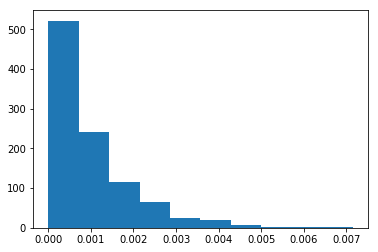

In [11]:
from scipy.stats import chi

_pvals2 = [random.random() for _ in range(1000)] + [0.9]*2
#_pvals2 = np.random.normal(0, 1, 1000)
#_pvals2 = chi.rvs(12, size=1000)
print(stats.kstest(_pvals2, 'uniform'))
print(klinec(_pvals2))

In [ ]:
def pick_km_statistic2(stats):
    if len(stats) == 0:
        return None
    for st in ['kolm']:
        for cur in stats:
            name = cur.name.lower()
            if name.startswith(st):
                return cur
    return stats[0]

mt6 = []
for ix, ex in enumerate(js):
    ex['pvals'] = []
    ex['stats'] = []
    ex['allstats'] = []
    ex['stats_names'] = []
    ex['my_ks'] = []
    
    for sid in ex['subid']:
        sid = int(sid)
        stest = loader.sids[sid]
        st = pick_km_statistic2(stest.stats)
        ex['pvals'].append(stest.pvals)
        ex['stats'].append(st.value if st else None)
        ex['stats_names'].append(st.name if st else None)
        ex['allstats'].append([(x.name, x.value, x.passed) for x in stest.stats])
        ex['my_ks'].append(stats.kstest(stest.pvals, 'uniform') if stest.pvals else None)
        if len(stest.pvals)>=10:
            _av = np.average(stest.pvals)
            if _av > 0.59:
                mt6.append((sid, _av, len(stest.pvals), stest.pvals))

for x in mt6:
    print(x)
#json.dump(js, open('syso-susp-pvals.json', 'w+'), indent=2)
    

In [13]:
json.dump(js, open('syso-susp-pvals.json', 'w+'), indent=2)

In [14]:
from scipy.stats import uniform
rv = uniform()

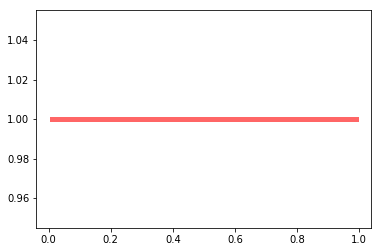

In [15]:
x = np.linspace(uniform.ppf(0.01),uniform.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, uniform.pdf(x), 'r-', lw=5, alpha=0.6, label='uniform pdf')